In [1]:
suppressMessages(library(tidyverse))
suppressMessages(library(parallel))
suppressMessages(library(Seurat))
suppressMessages(library(patchwork))
suppressMessages(library(Matrix))
#suppressMessages(libraryoptions(repr.plot.width=15, repr.plot.height=15)options(repr.plot.width=15, repr.plot.height=15)(viridis))
suppressMessages(library(cowplot))
suppressMessages(library(ggsci))
suppressMessages(library(pheatmap))
suppressMessages(library(RColorBrewer))
suppressMessages(library(reshape2))
suppressMessages(library(LSD))
suppressMessages(library(readxl))
suppressMessages(library(ggrepel))
suppressMessages(library(harmony))
suppressMessages(library(scrattch.hicat))
library(UpSetR)
library(tidyverse)  
library(corrr)
library(viridis)

options(future.globals.maxSize= 891289600 * 16)

Loading required package: viridisLite



In [2]:

outdir='/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/1109_compare_to_8_cortex'
combineSeuratList_raw=readRDS(paste0(outdir, "/8area_compare_list.rds"))


In [3]:
ref_anno=read.csv('/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/3area_compare_1023/add_amygdala_renew_1204/compare_to_cortex/inte_anno.csv')

Cortex_10=combineSeuratList_raw$Cortex_10
Cortex_24=combineSeuratList_raw$Cortex_24
Cortex_7A=combineSeuratList_raw$Cortex_7A
Cortex_TE=combineSeuratList_raw$Cortex_TE
Cortex_F1=combineSeuratList_raw$Cortex_F1

ref=Cortex_10@meta.data
ref$X=rownames(ref)
ref_renew=left_join(ref,ref_anno,by = 'X')
Cortex_10=AddMetaData(Cortex_10,col.name = 'renew_type1',ref_renew$renew_type1)

ref=Cortex_24@meta.data
ref$X=rownames(ref)
ref_renew=left_join(ref,ref_anno,by = 'X')
Cortex_24=AddMetaData(Cortex_24,col.name = 'renew_type1',ref_renew$renew_type1)

ref=Cortex_7A@meta.data
ref$X=rownames(ref)
ref_renew=left_join(ref,ref_anno,by = 'X')
Cortex_7A=AddMetaData(Cortex_7A,col.name = 'renew_type1',ref_renew$renew_type1)

ref=Cortex_TE@meta.data
ref$X=rownames(ref)
ref_renew=left_join(ref,ref_anno,by = 'X')
Cortex_TE=AddMetaData(Cortex_TE,col.name = 'renew_type1',ref_renew$renew_type1)

ref=Cortex_F1@meta.data
ref$X=rownames(ref)
ref_renew=left_join(ref,ref_anno,by = 'X')
Cortex_F1=AddMetaData(Cortex_F1,col.name = 'renew_type1',ref_renew$renew_type1)

Cortex_10$renew_type2=Cortex_10$renew_type1
Cortex_10@meta.data[Cortex_10@meta.data$renew_type2 %in% c('L5 IT','L6 IT'),]$renew_type2='L5/6 IT'
Cortex_10_sub=subset(Cortex_10,renew_type2 %in% c('L5/6 IT','L5/6 IT Car3','L6 CT','L6b',
                                                  'INPVALB','INSST','INLAMP5','INVIP','INCHC','INRELN'))

Cortex_24$renew_type2=Cortex_24$renew_type1
Cortex_24@meta.data[Cortex_24@meta.data$renew_type2 %in% c('L5 IT','L6 IT'),]$renew_type2='L5/6 IT'
Cortex_24_sub=subset(Cortex_24,renew_type2 %in% c('L5/6 IT','L5/6 IT Car3','L6 CT','L6b',
                                                  'INPVALB','INSST','INLAMP5','INVIP','INCHC','INRELN'))

Cortex_7A$renew_type2=Cortex_7A$renew_type1
Cortex_7A@meta.data[Cortex_7A@meta.data$renew_type2 %in% c('L5 IT','L6 IT'),]$renew_type2='L5/6 IT'
Cortex_7A_sub=subset(Cortex_7A,renew_type2 %in% c('L5/6 IT','L5/6 IT Car3','L6 CT','L6b',
                                                  'INPVALB','INSST','INLAMP5','INVIP','INCHC','INRELN'))

Cortex_TE$renew_type2=Cortex_TE$renew_type1
Cortex_TE@meta.data[Cortex_TE@meta.data$renew_type2 %in% c('L5 IT','L6 IT'),]$renew_type2='L5/6 IT'
Cortex_TE_sub=subset(Cortex_TE,renew_type2 %in% c('L5/6 IT','L5/6 IT Car3','L6 CT','L6b',
                                                  'INPVALB','INSST','INLAMP5','INVIP','INCHC','INRELN'))

Cortex_F1$renew_type2=Cortex_F1$renew_type1
Cortex_F1@meta.data[Cortex_F1@meta.data$renew_type2 %in% c('L5 IT','L6 IT'),]$renew_type2='L5/6 IT'
Cortex_F1_sub=subset(Cortex_F1,renew_type2 %in% c('L5/6 IT','L5/6 IT Car3','L6 CT','L6b',
                                                  'INPVALB','INSST','INLAMP5','INVIP','INCHC','INRELN'))


In [4]:

Cortex_V1=combineSeuratList_raw$Cortex_V1


In [5]:
ref_anno=read.csv('/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/3area_compare_1023/add_amygdala_renew_1204/compare_to_cortex/inte_anno.csv')
area=unique(ref_anno$group)
area=setdiff(area,'Insular')
ref_anno=ref_anno[ref_anno$group %in% area,]
ref_anno=ref_anno[,c('renew_type1','Cluster')]
ref_anno=ref_anno[!duplicated(ref_anno),]
head(ref_anno)

ref=Cortex_V1@meta.data
ref$X=rownames(ref)
ref_renew=left_join(ref,ref_anno,by = 'Cluster')
Cortex_V1=AddMetaData(Cortex_V1,col.name = 'renew_type1',ref_renew$renew_type1)


,renew_type1,Cluster
,<chr>,<chr>
12563,L6 IT,EX-L6-15
12564,L6b,EX-L5-L6-62
12565,L2/3 IT,EX-L3-5
12566,L2/3 IT,EX-L3-L4-86
12567,L2/3 IT,EX-L2-L3-39
12568,L5/6 IT Car3,EX-L3-44


In [6]:


Cortex_V1$renew_type2=Cortex_V1$renew_type1
Cortex_V1@meta.data[Cortex_V1@meta.data$renew_type2 %in% c('L5 IT','L6 IT'),]$renew_type2='L5/6 IT'
Cortex_V1_sub=subset(Cortex_V1,renew_type2 %in% c('L5/6 IT','L5/6 IT Car3','L6 CT','L6b',
                                                  'INPVALB','INSST','INLAMP5','INVIP','INCHC','INRELN'))
Cortex_V1_sub$renew_type3=gsub('IN','GABA_',Cortex_V1_sub$renew_type2)

Idents(Cortex_V1_sub) = "renew_type3"
Cortex_V1_sub=subset(Cortex_V1_sub,downsample=300)
DefaultAssay(Cortex_V1_sub) = "SCT"
Cortex_V1_Marker = FindAllMarkers(Cortex_V1_sub)


Calculating cluster GABA_PVALB

Calculating cluster GABA_SST

Calculating cluster L5/6 IT

Calculating cluster L5/6 IT Car3

Calculating cluster L6b

Calculating cluster GABA_LAMP5

Calculating cluster GABA_RELN

Calculating cluster GABA_VIP

Calculating cluster L6 CT

Calculating cluster GABA_CHC



In [7]:
Cortex_V1$renew_type3=gsub('IN','GABA_',Cortex_V1$renew_type2)
Cortex_F1$renew_type3=gsub('IN','GABA_',Cortex_F1$renew_type2)
Cortex_10$renew_type3=gsub('IN','GABA_',Cortex_10$renew_type2)
Cortex_24$renew_type3=gsub('IN','GABA_',Cortex_24$renew_type2)
Cortex_TE$renew_type3=gsub('IN','GABA_',Cortex_TE$renew_type2)
Cortex_7A$renew_type3=gsub('IN','GABA_',Cortex_7A$renew_type2)

Cortex_10_sub=subset(Cortex_10,renew_type2 %in% c('L5/6 IT','L5/6 IT Car3','L6 CT','L6b',
                                                  'INPVALB','INSST','INLAMP5','INVIP','INCHC','INRELN'))
Cortex_24_sub=subset(Cortex_24,renew_type2 %in% c('L5/6 IT','L5/6 IT Car3','L6 CT','L6b',
                                                  'INPVALB','INSST','INLAMP5','INVIP','INCHC','INRELN'))
Cortex_7A_sub=subset(Cortex_7A,renew_type2 %in% c('L5/6 IT','L5/6 IT Car3','L6 CT','L6b',
                                                  'INPVALB','INSST','INLAMP5','INVIP','INCHC','INRELN'))
Cortex_TE_sub=subset(Cortex_TE,renew_type2 %in% c('L5/6 IT','L5/6 IT Car3','L6 CT','L6b',
                                                  'INPVALB','INSST','INLAMP5','INVIP','INCHC','INRELN'))
Cortex_F1_sub=subset(Cortex_F1,renew_type2 %in% c('L5/6 IT','L5/6 IT Car3','L6 CT','L6b',
                                                  'INPVALB','INSST','INLAMP5','INVIP','INCHC','INRELN'))


Idents(Cortex_F1_sub) = "renew_type3"
Cortex_F1_sub=subset(Cortex_F1_sub,downsample=300)
DefaultAssay(Cortex_F1_sub) = "SCT"
Cortex_F1_Marker = FindAllMarkers(Cortex_F1_sub)

Idents(Cortex_TE_sub) = "renew_type3"
Cortex_TE_sub=subset(Cortex_TE_sub,downsample=300)
DefaultAssay(Cortex_TE_sub) = "SCT"
Cortex_TE_Marker = FindAllMarkers(Cortex_TE_sub)

Idents(Cortex_10_sub) = "renew_type3"
Cortex_10_sub=subset(Cortex_10_sub,downsample=300)
DefaultAssay(Cortex_10_sub) = "SCT"
Cortex_10_Marker = FindAllMarkers(Cortex_10_sub)

Idents(Cortex_24_sub) = "renew_type3"
Cortex_24_sub=subset(Cortex_24_sub,downsample=300)
DefaultAssay(Cortex_24_sub) = "SCT"
Cortex_24_Marker = FindAllMarkers(Cortex_24_sub)

Idents(Cortex_7A_sub) = "renew_type3"
Cortex_7A_sub=subset(Cortex_7A_sub,downsample=300)
DefaultAssay(Cortex_7A_sub) = "SCT"
Cortex_7A_Marker = FindAllMarkers(Cortex_7A_sub)


Calculating cluster L5/6 IT

Calculating cluster L6b

Calculating cluster L6 CT

Calculating cluster GABA_PVALB

Calculating cluster L5/6 IT Car3

Calculating cluster GABA_VIP

Calculating cluster GABA_SST

Calculating cluster GABA_LAMP5

Calculating cluster GABA_CHC

Calculating cluster L5/6 IT

Calculating cluster GABA_PVALB

Calculating cluster L5/6 IT Car3

Calculating cluster GABA_RELN

Calculating cluster GABA_SST

Calculating cluster GABA_LAMP5

Calculating cluster GABA_CHC

Calculating cluster L6 CT

Calculating cluster GABA_VIP

Calculating cluster L6b

Calculating cluster L5/6 IT

Calculating cluster L6b

Calculating cluster L5/6 IT Car3

Calculating cluster GABA_PVALB

Calculating cluster GABA_LAMP5

Calculating cluster L6 CT

Calculating cluster GABA_CHC

Calculating cluster GABA_SST

Calculating cluster GABA_RELN

Calculating cluster GABA_VIP

Calculating cluster L6 CT

Calculating cluster L5/6 IT

Calculating cluster L6b

Calculating cluster GABA_SST

Calculating cluster 

In [8]:

readdir='/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/3area_compare_1225/3area_data/'
readdir='/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/3area_compare_1225/3area_data/'
insu = readRDS('/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/Insular_renew_1016/batch_normalize_renew_240115/dif_res_anno/final_anno/46cl_240122_Cluster_Supercluster_res11.rds')
cla=readRDS('/home/liuyx/liuyuxuan/spa_seurat/cla/macaca/sn_0821_renew_batch3_all/batch_normalize_renew_0105/dif_res_anno1/final_anno/48cl_240118_merge_oligo_Cluster_Supercluster_res12.rds')

Idents(cla)='Subclass'
cla=subset(cla,downsample=300)
Idents(insu)='Subclass'
insu=subset(insu,downsample=250)



In [9]:
ex_n=unique(cla@meta.data$SuperCluster)[grep('GLUT',unique(cla@meta.data$SuperCluster))]
in_n=unique(cla@meta.data$SuperCluster)[grep('GABA',unique(cla@meta.data$SuperCluster))]
cla_sub=subset(cla,SuperCluster %in% c(in_n,ex_n))

cla_sub$renew_type2=cla_sub$SuperCluster
cla_sub@meta.data[cla_sub@meta.data$Subclass %in% c('Excit_Neuron_21','Excit_Neuron_15'),]$renew_type2='EX_VENO_L6b'
cla_sub@meta.data[cla_sub@meta.data$Subclass %in% c('Excit_Neuron_12'),]$renew_type2='EX_VENO_L6CT'


Idents(cla_sub) = "renew_type2"
cla_sub=subset(cla_sub,downsample=300)
DefaultAssay(cla_sub) = "SCT"
cla_sub_Marker = FindAllMarkers(cla_sub)



Calculating cluster GLUT_GNB4-

Calculating cluster EX_VENO_L6b

Calculating cluster GLUT_GNB4+

Calculating cluster EX_VENO_L6CT

Calculating cluster GABA_VIP

Calculating cluster GABA_PVALB

Calculating cluster GABA_SST

Calculating cluster GABA_CHC

Calculating cluster GABA_RELN

Calculating cluster GABA_LAMP5

Calculating cluster GABA_LAMP5_LHX6

Calculating cluster GABA_DRD2



In [10]:
table(insu@meta.data$SuperCluster)


       Astrocytes          GABA_CHC        GABA_LAMP5   GABA_LAMP5_LHX6 
              750               250               250               250 
       GABA_PVALB         GABA_RELN          GABA_SST          GABA_VIP 
             1250               750              1250               750 
     GLUT_L2/3 IT        GLUT_L4 IT        GLUT_L5 ET        GLUT_L5 IT 
             1500              1250               250               250 
GLUT_L5/6 IT Car3      GLUT_L5/6 NP        GLUT_L6 CT        GLUT_L6 IT 
              250               250               250               500 
         GLUT_L6b         Microglia             Oligo               OPC 
              250               250               500               500 

In [12]:
insu$renew_type2=insu$SuperCluster
insu@meta.data[insu@meta.data$SuperCluster %in% c('GLUT_L5 IT','GLUT_L6 IT'),]$renew_type2='GLUT_L5/6 IT'
all_n=unique(insu$renew_type2)
ex_n=all_n[grep('GLUT',all_n)]
in_n=all_n[grep('GABA',all_n)]
insu_sub=subset(insu,renew_type2 %in% c(ex_n,in_n))


Idents(insu_sub) = "renew_type2"
insu_sub=subset(insu_sub,downsample=300)
DefaultAssay(insu_sub) = "SCT"
insu_sub_Marker = FindAllMarkers(insu_sub)


Calculating cluster GLUT_L5 ET

Calculating cluster GLUT_L2/3 IT

Calculating cluster GLUT_L4 IT

Calculating cluster GLUT_L5/6 IT

Calculating cluster GLUT_L5/6 NP

Calculating cluster GLUT_L5/6 IT Car3

Calculating cluster GLUT_L6 CT

Calculating cluster GLUT_L6b

Calculating cluster GABA_SST

Calculating cluster GABA_VIP

Calculating cluster GABA_PVALB

Calculating cluster GABA_LAMP5_LHX6

Calculating cluster GABA_RELN

Calculating cluster GABA_LAMP5

Calculating cluster GABA_CHC



In [13]:
all_n=unique(insu$renew_type2)
ex_n=all_n[grep('GLUT',all_n)]
in_n=all_n[grep('GABA',all_n)]


In [14]:
Cortex_10_Marker_fil = subset(Cortex_10_Marker, p_val_adj < 0.1 )
Cortex_24_Marker_fil = subset(Cortex_24_Marker, p_val_adj < 0.1 )
Cortex_7A_Marker_fil = subset(Cortex_7A_Marker, p_val_adj < 0.1 )
Cortex_TE_Marker_fil = subset(Cortex_TE_Marker, p_val_adj < 0.1 )
Cortex_F1_Marker_fil = subset(Cortex_F1_Marker, p_val_adj < 0.1 )
Cortex_V1_Marker_fil = subset(Cortex_V1_Marker, p_val_adj < 0.1 )
insu_sub_Marker_fil=subset(insu_sub_Marker, p_val_adj < 0.1 )
cla_sub_Marker_fil=subset(cla_sub_Marker, p_val_adj < 0.1 )



In [15]:
Cortex_10_Marker_fil=Cortex_10_Marker_fil %>% group_by(cluster) %>% top_n(n=1000,wt=avg_log2FC)
Cortex_24_Marker_fil=Cortex_24_Marker_fil %>% group_by(cluster) %>% top_n(n=1000,wt=avg_log2FC)
Cortex_7A_Marker_fil=Cortex_7A_Marker_fil %>% group_by(cluster) %>% top_n(n=1000,wt=avg_log2FC)
Cortex_TE_Marker_fil=Cortex_TE_Marker_fil %>% group_by(cluster) %>% top_n(n=1000,wt=avg_log2FC)
Cortex_F1_Marker_fil=Cortex_F1_Marker_fil %>% group_by(cluster) %>% top_n(n=1000,wt=avg_log2FC)
Cortex_V1_Marker_fil=Cortex_V1_Marker_fil %>% group_by(cluster) %>% top_n(n=1000,wt=avg_log2FC)
insu_sub_Marker_fil=insu_sub_Marker_fil %>% group_by(cluster) %>% top_n(n=1000,wt=avg_log2FC)
cla_sub_Marker_fil=cla_sub_Marker_fil %>% group_by(cluster) %>% top_n(n=1000,wt=avg_log2FC)




In [16]:
table(Cortex_F1_Marker_fil$cluster)


     L5/6 IT          L6b        L6 CT   GABA_PVALB L5/6 IT Car3     GABA_VIP 
         745         1000          830         1000          885          275 
    GABA_SST   GABA_LAMP5     GABA_CHC 
         862         1000          449 

In [17]:
cla_sub_Marker_fil$X=rownames(cla_sub_Marker_fil)
insu_sub_Marker_fil$X=rownames(insu_sub_Marker_fil)
Cortex_V1_Marker_fil$X=rownames(Cortex_V1_Marker_fil)

In [18]:
unique(Cortex_24_Marker_fil$cluster)

[1] L6 CT        L5/6 IT      L6b          GABA_SST     GABA_RELN   
 [6] L5/6 IT Car3 GABA_LAMP5   GABA_PVALB   GABA_CHC     GABA_VIP    
10 Levels: L6 CT L5/6 IT L6b GABA_SST GABA_RELN L5/6 IT Car3 ... GABA_VIP

In [19]:
unique(insu_sub_Marker_fil$cluster)

[1] GLUT_L5 ET        GLUT_L2/3 IT      GLUT_L4 IT        GLUT_L5/6 IT     
 [5] GLUT_L5/6 NP      GLUT_L5/6 IT Car3 GLUT_L6 CT        GLUT_L6b         
 [9] GABA_SST          GABA_VIP          GABA_PVALB        GABA_LAMP5_LHX6  
[13] GABA_RELN         GABA_LAMP5        GABA_CHC         
15 Levels: GLUT_L5 ET GLUT_L2/3 IT GLUT_L4 IT GLUT_L5/6 IT ... GABA_CHC

In [20]:
unique(cla_sub_Marker_fil$cluster)

[1] GLUT_GNB4-      EX_VENO_L6b     GLUT_GNB4+      EX_VENO_L6CT   
 [5] GABA_VIP        GABA_PVALB      GABA_SST        GABA_CHC       
 [9] GABA_RELN       GABA_LAMP5      GABA_LAMP5_LHX6 GABA_DRD2      
12 Levels: GLUT_GNB4- EX_VENO_L6b GLUT_GNB4+ EX_VENO_L6CT ... GABA_DRD2

In [21]:
cla_sub_Marker_fil$cluster=gsub('EX_VENO_L6b','L6b',cla_sub_Marker_fil$cluster)
cla_sub_Marker_fil$cluster=gsub('EX_VENO_L6CT','L6 CT',cla_sub_Marker_fil$cluster)
cla_sub_Marker_fil[cla_sub_Marker_fil$cluster=='GLUT_GNB4-',]$cluster='L5/6 IT'
cla_sub_Marker_fil[cla_sub_Marker_fil$cluster=='GLUT_GNB4+',]$cluster='L5/6 IT Car3'


In [22]:

Cortex_10_Marker_fil$area = "Cortex_10"
Cortex_24_Marker_fil$area = "Cortex_24"
Cortex_7A_Marker_fil$area = "Cortex_7A"
Cortex_TE_Marker_fil$area = "Cortex_TE"
Cortex_F1_Marker_fil$area = "Cortex_F1"
Cortex_V1_Marker_fil$area = "Cortex_V1"
insu_sub_Marker_fil$area = "Insular"
cla_sub_Marker_fil$area = "Claustrum"

subclassFiltMarkerTb = as_tibble(Reduce(rbind, list(
    Cortex_10_Marker_fil, Cortex_24_Marker_fil,Cortex_7A_Marker_fil,Cortex_TE_Marker_fil,Cortex_F1_Marker_fil,Cortex_V1_Marker_fil,
    insu_sub_Marker_fil,cla_sub_Marker_fil
)))
str(subclassFiltMarkerTb)

subclassFiltMarkerTb$renew_cluster=subclassFiltMarkerTb$cluster

subclassFiltMarkerTb$renew_cluster=gsub('EX_VENO_L6b','L6b',subclassFiltMarkerTb$renew_cluster)
subclassFiltMarkerTb$renew_cluster=gsub('EX_VENO_L6CT','L6 CT',subclassFiltMarkerTb$renew_cluster)
subclassFiltMarkerTb[subclassFiltMarkerTb$renew_cluster=='GLUT_GNB4-',]$renew_cluster='L5/6 IT'
subclassFiltMarkerTb[subclassFiltMarkerTb$renew_cluster=='GLUT_GNB4+',]$renew_cluster='L5/6 IT Car3'

subclassFiltMarkerTb$renew_cluster=gsub('GLUT_','',subclassFiltMarkerTb$renew_cluster)
subclassFiltMarkerTb$renew_cluster=gsub('GABA_','',subclassFiltMarkerTb$renew_cluster)


subclassFiltMarkerTb = subclassFiltMarkerTb %>% group_by(renew_cluster, gene) %>% mutate(
    conservedSpeciesNum = n(),
    conservedSpeciesPair = paste(sort(area), collapse="&"),
    conservedFlag = ifelse(
        conservedSpeciesNum == 8, "conserved", ifelse(
            conservedSpeciesNum == 1, "speciesDiff", "partialConserved"
        )
    )
) %>% ungroup()
table(subclassFiltMarkerTb$conservedFlag)




tibble [56,361 × 9] (S3: tbl_df/tbl/data.frame)
 $ p_val     : num [1:56361] 9.25e-113 1.15e-92 1.09e-84 1.11e-82 8.21e-81 ...
 $ avg_log2FC: num [1:56361] 1.42 1.2 1.11 1.08 1.4 ...
 $ pct.1     : num [1:56361] 0.56 0.607 0.653 1 0.847 0.81 0.973 0.077 0.363 0.697 ...
 $ pct.2     : num [1:56361] 0.097 0.142 0.186 0.969 0.36 0.303 0.665 0.661 0.057 0.251 ...
 $ p_val_adj : num [1:56361] 1.63e-108 2.03e-88 1.92e-80 1.96e-78 1.45e-76 ...
 $ cluster   : chr [1:56361] "L5/6 IT" "L5/6 IT" "L5/6 IT" "L5/6 IT" ...
 $ gene      : chr [1:56361] "RORB" "FSTL4" "ENSMFAG00000032887" "KCNIP4" ...
 $ area      : chr [1:56361] "Cortex_10" "Cortex_10" "Cortex_10" "Cortex_10" ...
 $ X         : chr [1:56361] NA NA NA NA ...



       conserved partialConserved      speciesDiff 
            8584            36735            11042 

In [23]:
unique(subclassFiltMarkerTb$renew_cluster)

[1] "L5/6 IT"      "L6b"          "L5/6 IT Car3" "PVALB"        "LAMP5"       
 [6] "L6 CT"        "CHC"          "SST"          "RELN"         "VIP"         
[11] "L5 ET"        "L2/3 IT"      "L4 IT"        "L5/6 NP"      "LAMP5_LHX6"  
[16] "DRD2"

In [24]:
area=c('INPVALB','INSST','INLAMP5','INVIP','INCHC','INRELN')

Cortex_10_sct=subset(Cortex_10_sub,renew_type2 %in% area)
Cortex_24_sct=subset(Cortex_24_sub,renew_type2 %in% area)
Cortex_7A_sct=subset(Cortex_7A_sub,renew_type2 %in% area)
Cortex_TE_sct=subset(Cortex_TE_sub,renew_type2 %in% area)
Cortex_F1_sct=subset(Cortex_F1_sub,renew_type2 %in% area)
Cortex_V1_sct=subset(Cortex_V1_sub,renew_type2 %in% area)
area=gsub('IN','GABA_',area)
cla_sct1=subset(cla_sub,renew_type2 %in% area)
insu_sct=subset(insu_sub,renew_type2 %in% area)

area=gsub('GABA_','',area)    
all=unique(subclassFiltMarkerTb[subclassFiltMarkerTb$renew_cluster %in% area ,]$gene)
all
all=intersect(all,rownames(Cortex_10_sct@assays$SCT@data))
all=intersect(all,rownames(Cortex_7A_sct@assays$SCT@data))
all=intersect(all,rownames(insu_sct@assays$SCT@data))
all=intersect(all,rownames(cla_sct1@assays$SCT@data))


[1] "TMEM132C"           "SLIT2"              "SOX6"              
   [4] "NXPH1"              "SLC9A9"             "RASGRF2"           
   [7] "ERBB4"              "MYO5B"              "CCBE1"             
  [10] "EYS"                "DSCAM"              "RGS5"              
  [13] "PTPRM"              "POSTN"              "GAD1"              
  [16] "NRXN1"              "KIF26B"             "EPHA6"             
  [19] "ARPP21"             "ZNF804A"            "BTBD11"            
  [22] "KCNC2"              "KCNAB1"             "DOCK11"            
  [25] "CRB1"               "WIPF3"              "PTCHD4"            
  [28] "LHX6"               "LRRTM4"             "UNC5D"             
  [31] "CNTNAP2"            "NDST3"              "FGF12"             
  [34] "VWC2"               "CACNA2D3"           "MYO16"             
  [37] "LYPD6"              "ZNF385D"            "RHOBTB3"           
  [40] "FRMD4B"             "PCDH9"              "HTR7"              
  [43] "CACNA2D1"           "GALNT7"             "EPHA5"             
  [46] "FAM19A2"            "CRHBP"              "KCNK13"            
  [49] "CEMIP"              "CTNNA2"             "MEF2C"             
  [52] "TAC1"               "FRMD5"              "WIF1"              
  [55] "TENM2"              "ANK1"               "GAD2"              
  [58] "TGFBR3"             "PLCL1"              "TMEM131L"          
  [61] "COL4A4"             "GRIA4"              "CUX2"              
  [64] "CLSTN2"             "OXR1"               "SPOCK3"            
  [67] "SDK1"               "KLF12"              "NELL2"             
  [70] "PLXNA4"             "PPIP5K2"            "NFIB"              
  [73] "PPARGC1A"           "ADCY8"              "USP44"             
  [76] "ADAMTS17"           "PLCB1"              "IL1RAPL1"          
  [79] "NTRK2"              "RPS6KA2"            "ITSN1"             
  [82] "GPC6"               "ADARB2"             "RIMS2"             
  [85] "IQGAP2"             "TENM3"              "TRPC4"             
  [88] "EEPD1"              "CDH7"               "KCNT2"             
  [91] "DPP10"              "NEDD4L"             "HS3ST4"            
  [94] "ARAP2"              "FSTL5"              "COL4A3"            
  [97] "MAGI1"              "PREX2"              "ITPR2"             
 [100] "SERPINI1"           "SPATS1"             "MAGI2"             
 [103] "PRKCA"              "GALNTL6"            "RASA1"             
 [106] "TMEM132D"           "PHACTR1"            "KALRN"             
 [109] "CALN1"              "ST8SIA4"            "SLIT3"             
 [112] "MARCH1"             "SPATS2L"            "RNF144B"           
 [115] "WASF3"              "GRIP2"              "KCND2"             
 [118] "SCN1A"              "CACNA1E"            "SPHKAP"            
 [121] "SLC4A10"            "CSMD2"              "PRKCB"             
 [124] "CELF2"              "CDH10"              "TCF4"              
 [127] "COBL"               "PRKG2"              "UNC5C"             
 [130] "PAM"                "KLHL5"              "CADPS2"            
 [133] "FLT3"               "SATB2"              "FAT3"              
 [136] "RYR3"               "RBMS3"              "MYO3A"             
 [139] "HUNK"               "RIMS1"              "EOGT"              
 [142] "PRKG1"              "LIMCH1"             "PLEKHH2"           
 [145] "ADRA1A"             "NECAB1"             "AFAP1"             
 [148] "GRID2"              "DAPK1"              "OSBPL3"            
 [151] "PCSK2"              "SEZ6L"              "CSMD3"             
 [154] "ELAVL2"             "PLXDC2"             "KIRREL3"           
 [157] "SLC4A7"             "XKR4"               "GRIA2"             
 [160] "RGS6"               "TOX2"               "ZMAT4"             
 [163] "SV2B"               "EPHA4"              "RXFP1"             
 [166] "PTPRR"              "RIPOR2"             "LUZP2"             
 [169] "GPM6B"              "LDB2"               "KCNH1"             
 [172] "NDST4

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


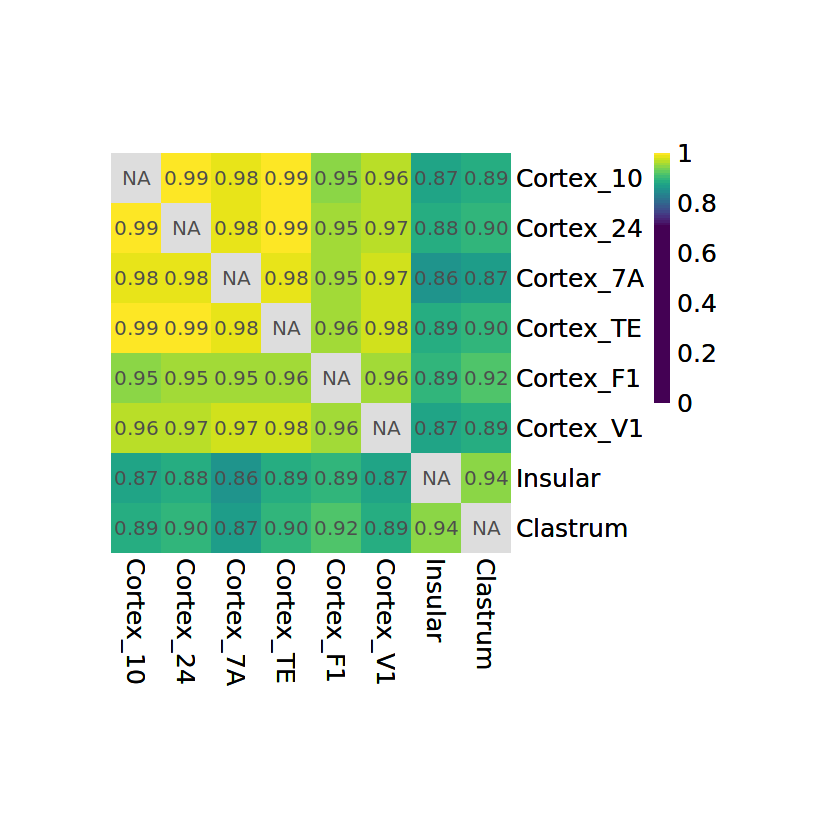

In [25]:

df=as.data.frame(Cortex_10_sct@assays$SCT@data[all,])
df_10=as.data.frame(apply(df,1,mean))
colnames(df_10)='Cortex_10'

df=as.data.frame(Cortex_24_sct@assays$SCT@data[all,])
df_24=as.data.frame(apply(df,1,mean))
colnames(df_24)='Cortex_24'

df=as.data.frame(Cortex_7A_sct@assays$SCT@data[all,])
df_7A=as.data.frame(apply(df,1,mean))
colnames(df_7A)='Cortex_7A'

df=as.data.frame(Cortex_TE_sct@assays$SCT@data[all,])
df_TE=as.data.frame(apply(df,1,mean))
colnames(df_TE)='Cortex_TE'

df=as.data.frame(Cortex_F1_sct@assays$SCT@data[all,])
df_F1=as.data.frame(apply(df,1,mean))
colnames(df_F1)='Cortex_F1'

df=as.data.frame(Cortex_V1_sct@assays$SCT@data[all,])
df_V1=as.data.frame(apply(df,1,mean))
colnames(df_V1)='Cortex_V1'

df=as.data.frame(insu_sct@assays$SCT@data[all,])
df_insu=as.data.frame(apply(df,1,mean))
colnames(df_insu)='Insular'

df=as.data.frame(cla_sct1@assays$SCT@data[all,])
df_cla=as.data.frame(apply(df,1,mean))
colnames(df_cla)='Clastrum'

all_df=cbind(df_10,df_24,df_7A,df_TE,df_F1,df_V1,df_insu,df_cla)


res.cor <- correlate(all_df)
res.cor=as.data.frame(res.cor)
rownames(res.cor)=res.cor$term
res.cor$term=NULL
options(repr.plot.width=7, repr.plot.height=7)
p1=pheatmap(res.cor
, breaks=seq(0,1,0.01), cluster_rows=F, cluster_cols=F, border_color=NA, cellwidth=30, cellheight=30, fontsize=15,
        color = c(rep(viridis(100)[1],70),viridis(30)),display_numbers = T )
return(p1)

In [54]:
unique(subclassFiltMarkerTb$renew_cluster)

[1] "L5/6 IT"      "L6b"          "L5/6 IT Car3" "PVALB"        "LAMP5"       
 [6] "L6 CT"        "CHC"          "SST"          "RELN"         "VIP"         
[11] "L5 ET"        "L2/3 IT"      "L4 IT"        "L5/6 NP"      "LAMP5_LHX6"  
[16] "DRD2"

In [82]:
df_analysis=subclassFiltMarkerTb[subclassFiltMarkerTb$renew_cluster=='L6 CT',]

nrow(subclassFiltMarkerTb[subclassFiltMarkerTb$renew_cluster=='L6 CT' &
                          subclassFiltMarkerTb$conservedFlag=='conserved',])
pair=df_analysis$conservedSpeciesPair
length(pair)-length(pair[grep('Claustrum.*Cortex_10',pair)])
length(pair)-length(pair[grep('Claustrum.*24',pair)])
length(pair)-length(pair[grep('Claustrum.*7A',pair)])
length(pair)-length(pair[grep('Claustrum.*Cortex_F1',pair)])
length(pair)-length(pair[grep('Claustrum.*Insu',pair)])
length(pair)-length(pair[grep('Claustrum.*Cortex_V1',pair)])


[1] 1264

[1] 2365

[1] 2321

[1] 2704

[1] 1995

[1] 2210

[1] 3279

[1] 1224

[1] 2671

[1] 2717

[1] 2332

[1] 3037

[1] 2710

[1] 1761

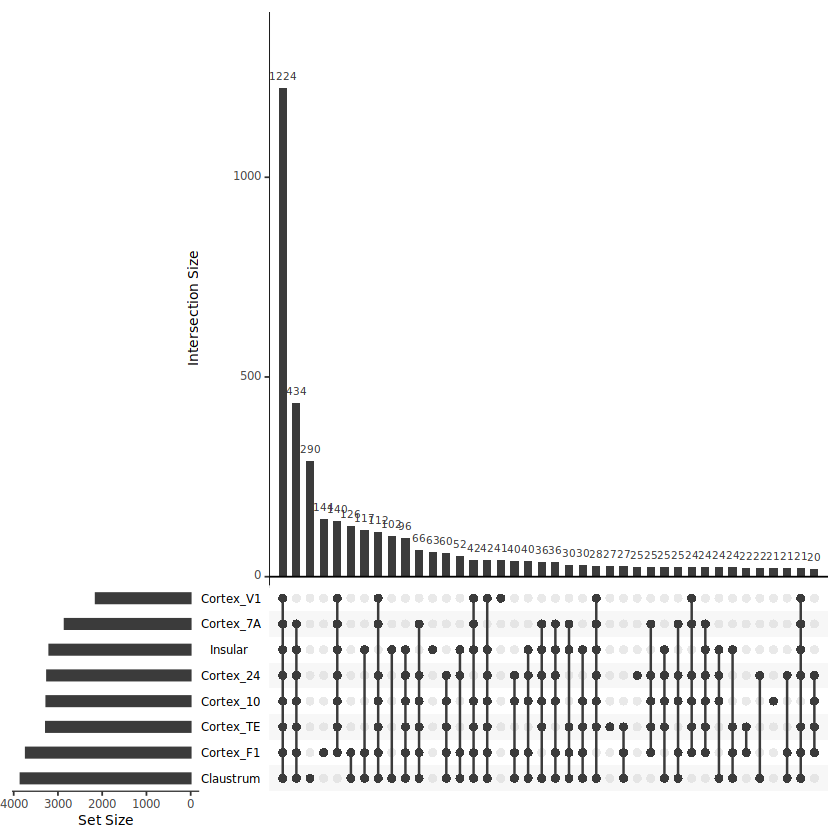

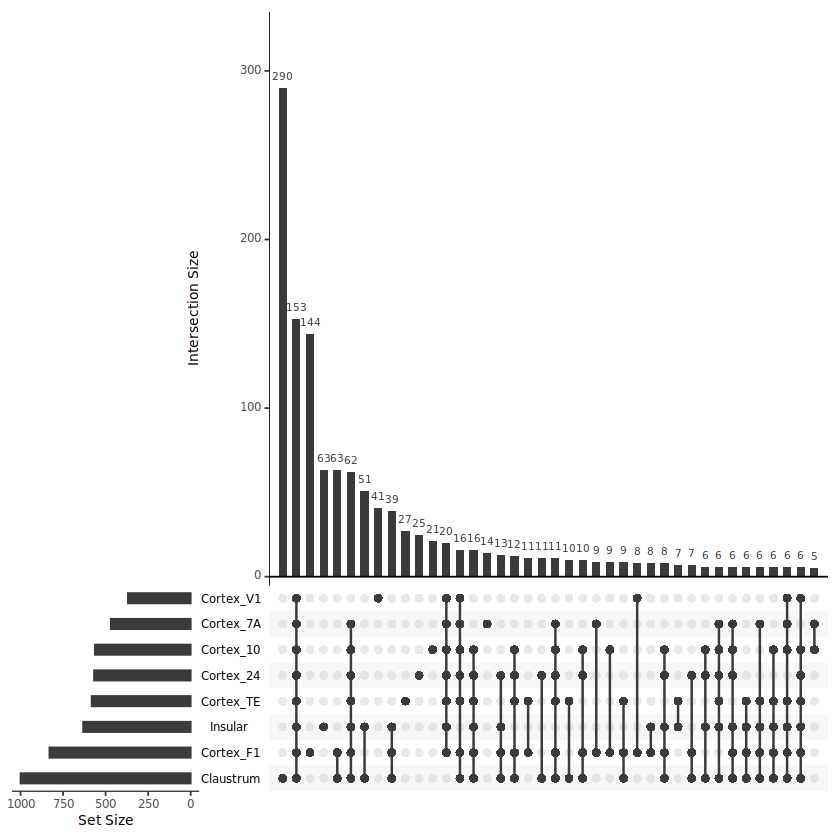

In [132]:
df_analysis=subclassFiltMarkerTb[subclassFiltMarkerTb$renew_cluster=='L6 CT',]

nrow(subclassFiltMarkerTb[subclassFiltMarkerTb$renew_cluster=='L6 CT' &
                          subclassFiltMarkerTb$conservedFlag=='conserved',])
pair=df_analysis$conservedSpeciesPair
length(pair[grep('Claustrum.*Cortex_10',pair)])
length(pair[grep('Claustrum.*24',pair)])
length(pair[grep('Claustrum.*7A',pair)])
length(pair[grep('Claustrum.*Cortex_F1',pair)])
length(pair[grep('Claustrum.*Insu',pair)])
length(pair[grep('Claustrum.*Cortex_V1',pair)])

df=as.data.frame(table(df_analysis$conservedSpeciesPair))
expressionInput=df$Freq
names(expressionInput)=df$Var1
upset(fromExpression(expressionInput), order.by = "freq",nsets = 8)

df$Freq_re=0
for(i in c(1:nrow(df))){
    df[i,]$Freq_re=length(unique(subclassFiltMarkerTb[subclassFiltMarkerTb$renew_cluster=='L6 CT' & subclassFiltMarkerTb$conservedSpeciesPair==df[i,]$Var1,]$gene))
}

expressionInput=df$Freq_re
names(expressionInput)=as.character(df$Var1)
upset(fromExpression(expressionInput), order.by = "freq",nsets = 8)



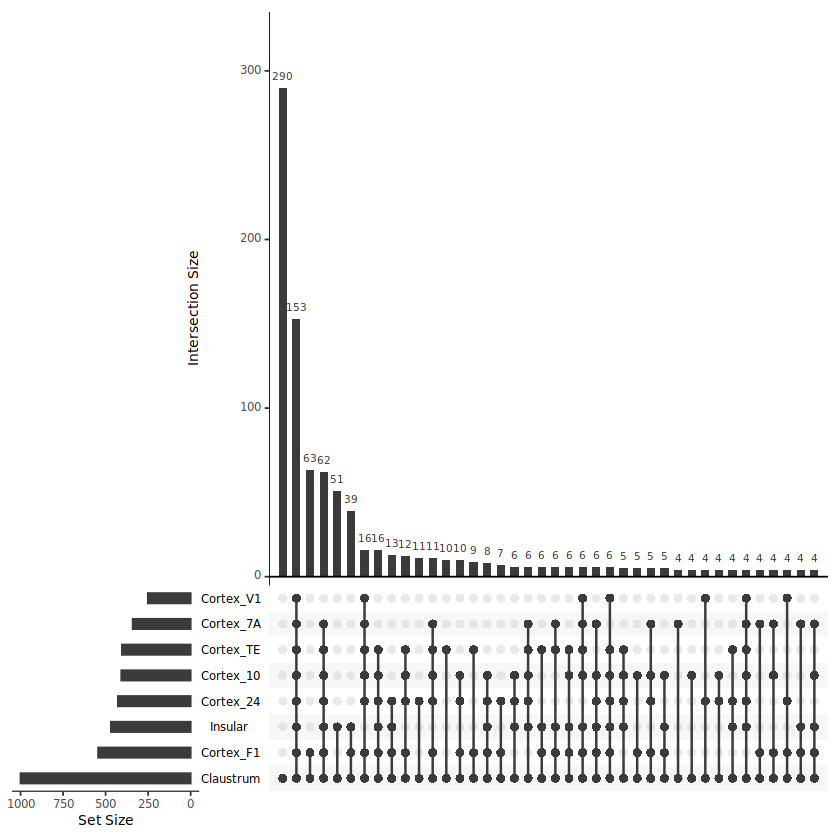

In [133]:
df1=df[grep('Claustrum',df$Var1),]

expressionInput=df1$Freq_re
names(expressionInput)=as.character(df1$Var1)
upset(fromExpression(expressionInput), order.by = "freq",nsets = 8)



Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


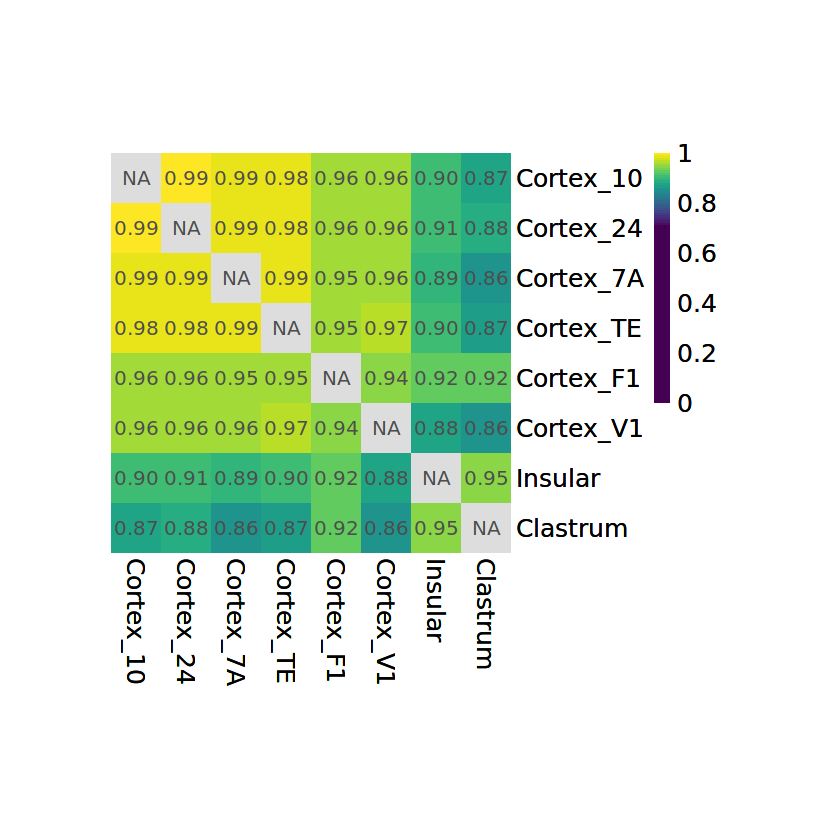

In [134]:
print_heatmap2('L6 CT')

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


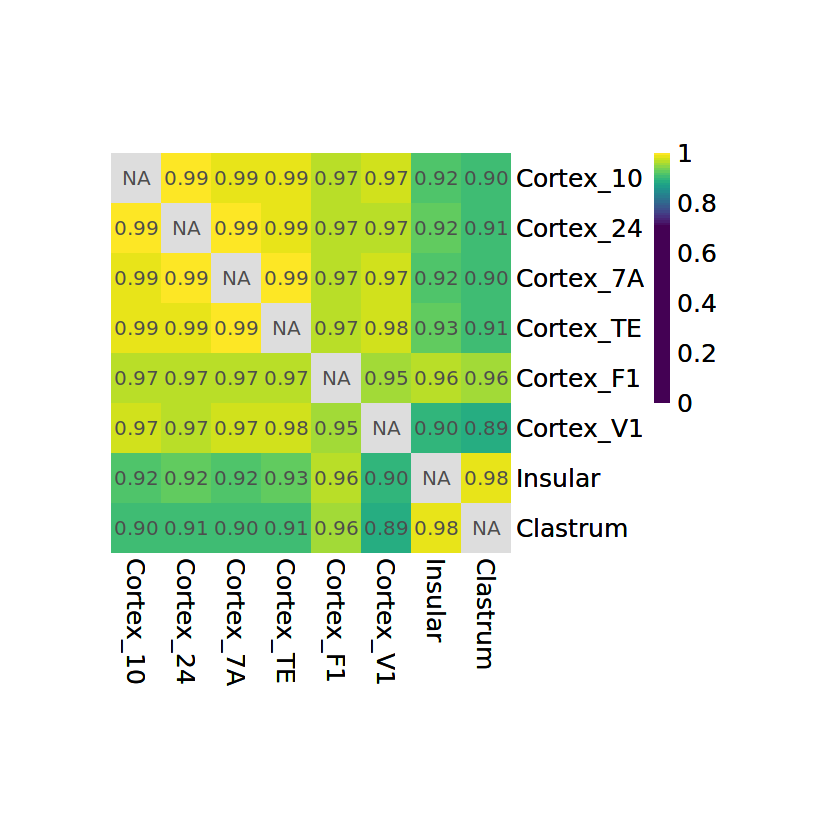

In [135]:
print_heatmap1('L6 CT')

[1] 1280

[1] 2384

[1] 2212

[1] 2179

[1] 2638

[1] 2680

[1] 2037

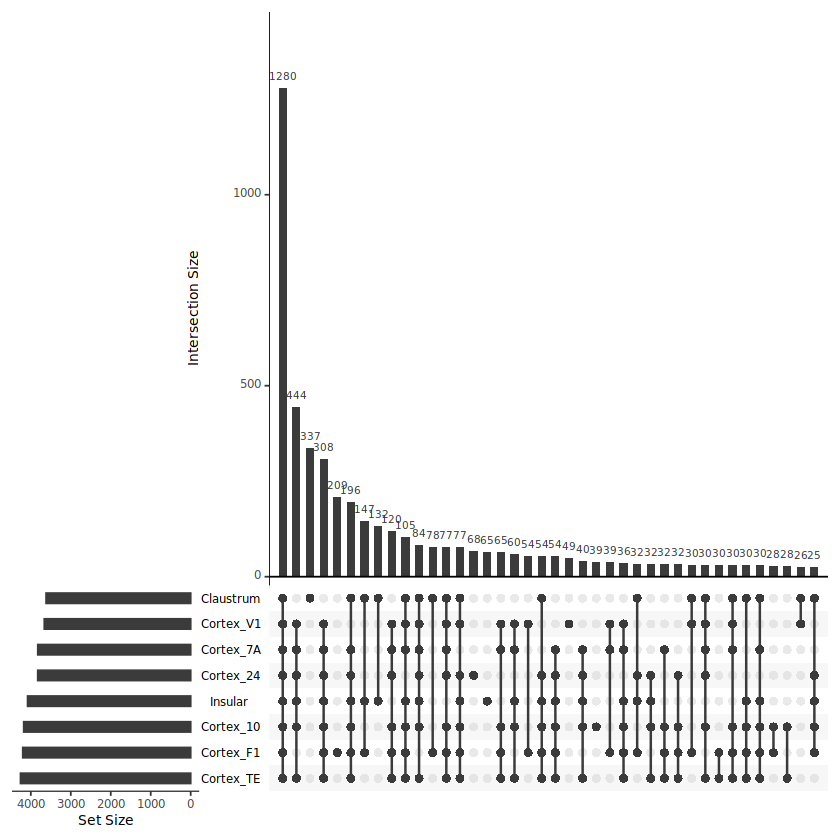

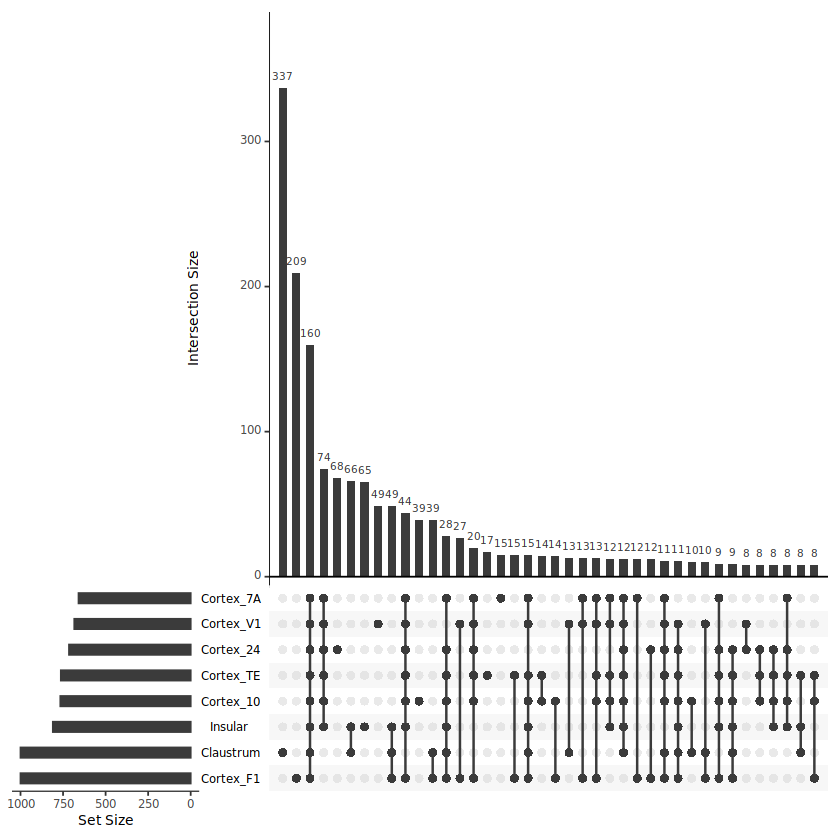

In [136]:
df_analysis=subclassFiltMarkerTb[subclassFiltMarkerTb$renew_cluster=='L6b',]
nrow(subclassFiltMarkerTb[subclassFiltMarkerTb$renew_cluster=='L6b' &
                          subclassFiltMarkerTb$conservedFlag=='conserved',])

pair=df_analysis$conservedSpeciesPair
length(pair[grep('Claustrum.*Cortex_10',pair)])
length(pair[grep('Claustrum.*24',pair)])
length(pair[grep('Claustrum.*7A',pair)])
length(pair[grep('Claustrum.*Cortex_F1',pair)])
length(pair[grep('Claustrum.*Insu',pair)])
length(pair[grep('Claustrum.*Cortex_V1',pair)])

df=as.data.frame(table(df_analysis$conservedSpeciesPair))
expressionInput=df$Freq
names(expressionInput)=df$Var1
upset(fromExpression(expressionInput), order.by = "freq",nsets = 8)

df$Freq_re=0
for(i in c(1:nrow(df))){
    df[i,]$Freq_re=length(unique(subclassFiltMarkerTb[subclassFiltMarkerTb$renew_cluster=='L6b' & subclassFiltMarkerTb$conservedSpeciesPair==df[i,]$Var1,]$gene))
}

expressionInput=df$Freq_re
names(expressionInput)=as.character(df$Var1)
upset(fromExpression(expressionInput), order.by = "freq",nsets = 8)



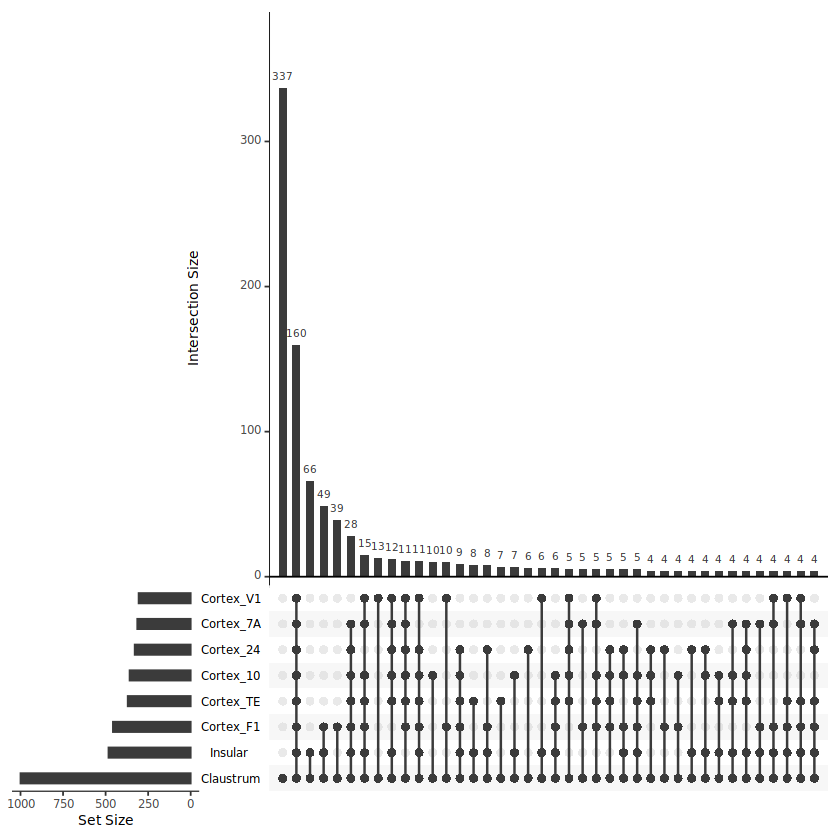

In [137]:
df1=df[grep('Claustrum',df$Var1),]

expressionInput=df1$Freq_re
names(expressionInput)=as.character(df1$Var1)
upset(fromExpression(expressionInput), order.by = "freq",nsets = 8)


Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


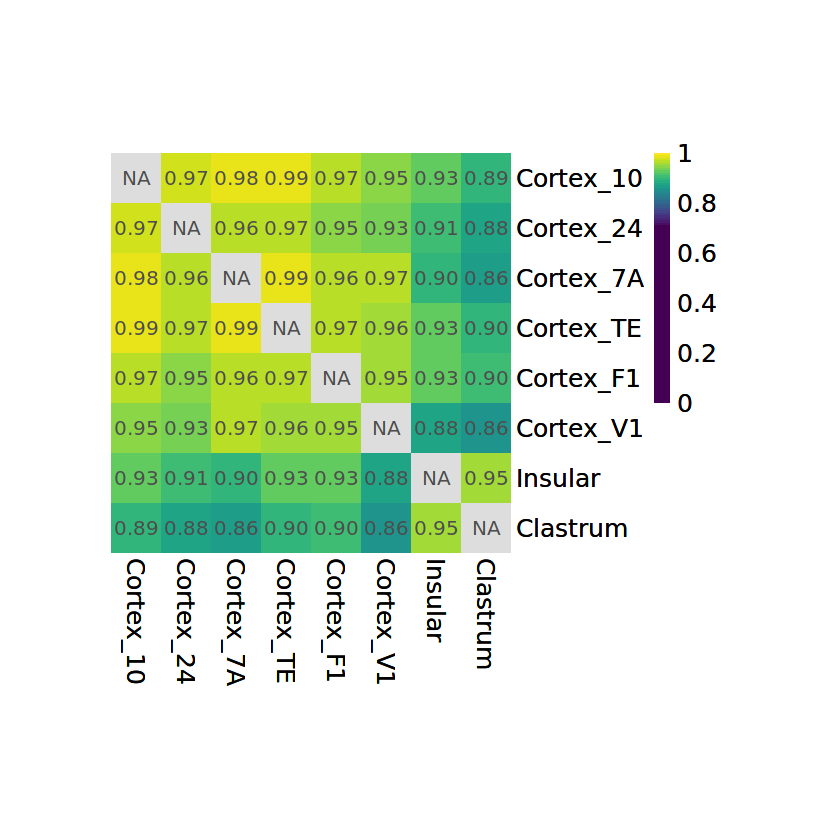

In [138]:
print_heatmap2('L6b')

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


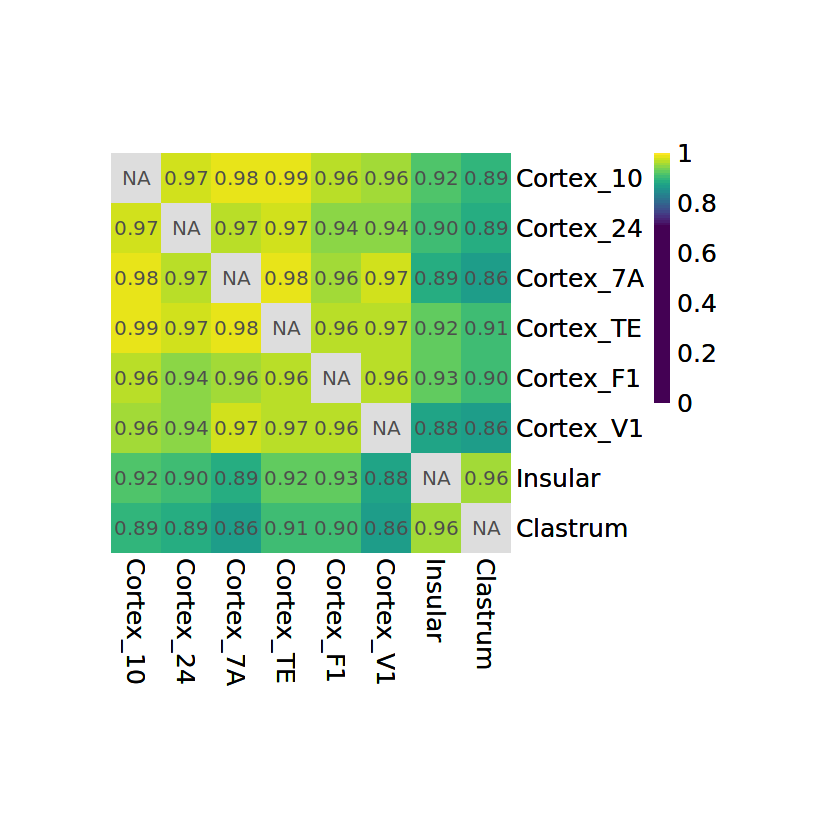

In [139]:
print_heatmap1('L6b')

[1] 1248

[1] 2312

[1] 2460

[1] 2036

[1] 2657

[1] 2391

[1] 1989

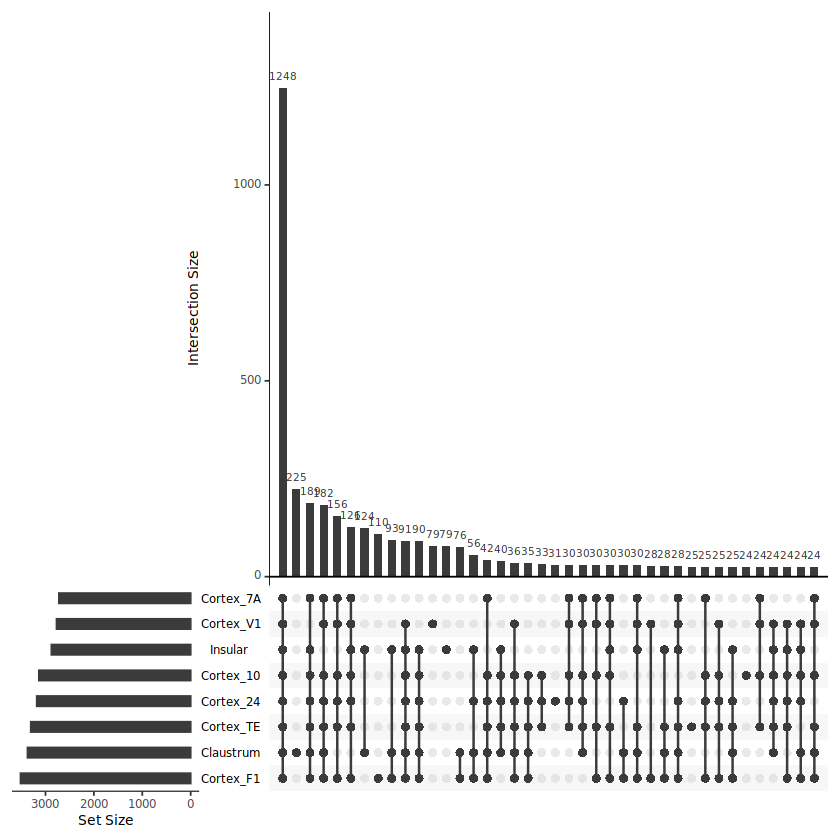

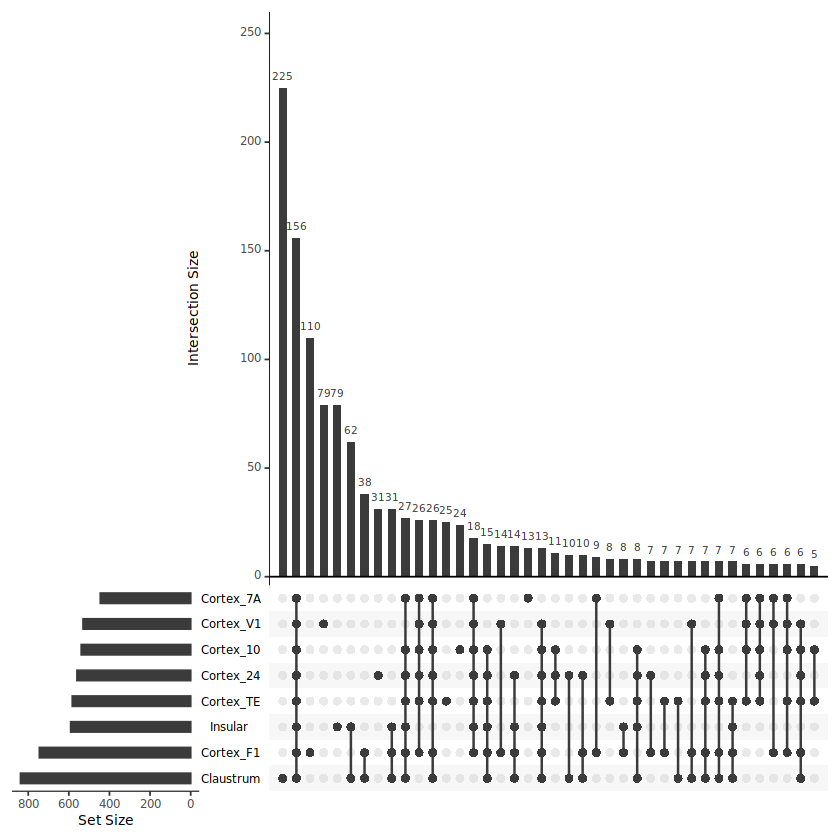

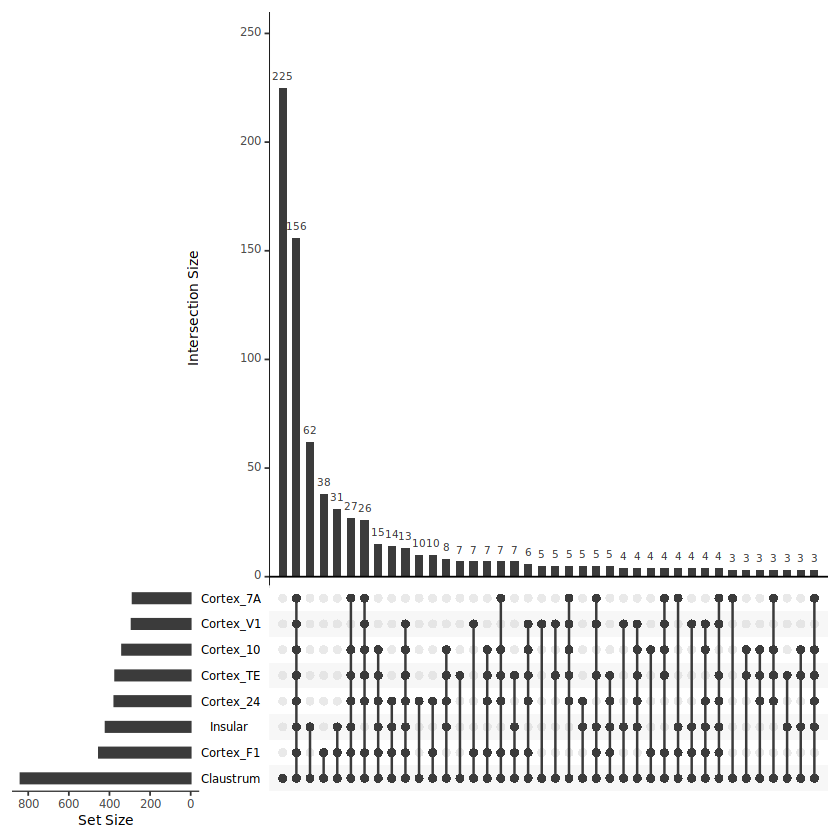

In [140]:
df_analysis=subclassFiltMarkerTb[subclassFiltMarkerTb$renew_cluster=='L5/6 IT',]
nrow(subclassFiltMarkerTb[subclassFiltMarkerTb$renew_cluster=='L5/6 IT' &
                          subclassFiltMarkerTb$conservedFlag=='conserved',])

pair=df_analysis$conservedSpeciesPair
length(pair[grep('Claustrum.*Cortex_10',pair)])
length(pair[grep('Claustrum.*24',pair)])
length(pair[grep('Claustrum.*7A',pair)])
length(pair[grep('Claustrum.*Cortex_F1',pair)])
length(pair[grep('Claustrum.*Insu',pair)])
length(pair[grep('Claustrum.*Cortex_V1',pair)])

df=as.data.frame(table(df_analysis$conservedSpeciesPair))
expressionInput=df$Freq
names(expressionInput)=df$Var1
upset(fromExpression(expressionInput), order.by = "freq",nsets = 8)

df$Freq_re=0
for(i in c(1:nrow(df))){
    df[i,]$Freq_re=length(unique(subclassFiltMarkerTb[subclassFiltMarkerTb$renew_cluster=='L5/6 IT' & subclassFiltMarkerTb$conservedSpeciesPair==df[i,]$Var1,]$gene))
}

expressionInput=df$Freq_re
names(expressionInput)=as.character(df$Var1)
upset(fromExpression(expressionInput), order.by = "freq",nsets = 8)

df1=df[grep('Claustrum',df$Var1),]

expressionInput=df1$Freq_re
names(expressionInput)=as.character(df1$Var1)
upset(fromExpression(expressionInput), order.by = "freq",nsets = 8)


Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


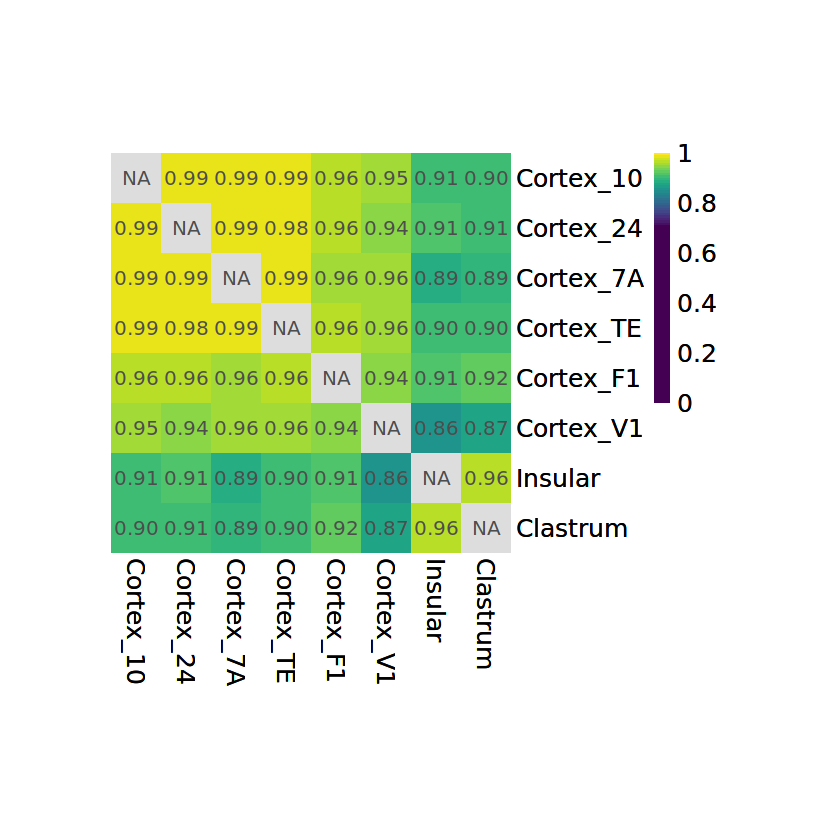

In [141]:
print_heatmap2('L5/6 IT')

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


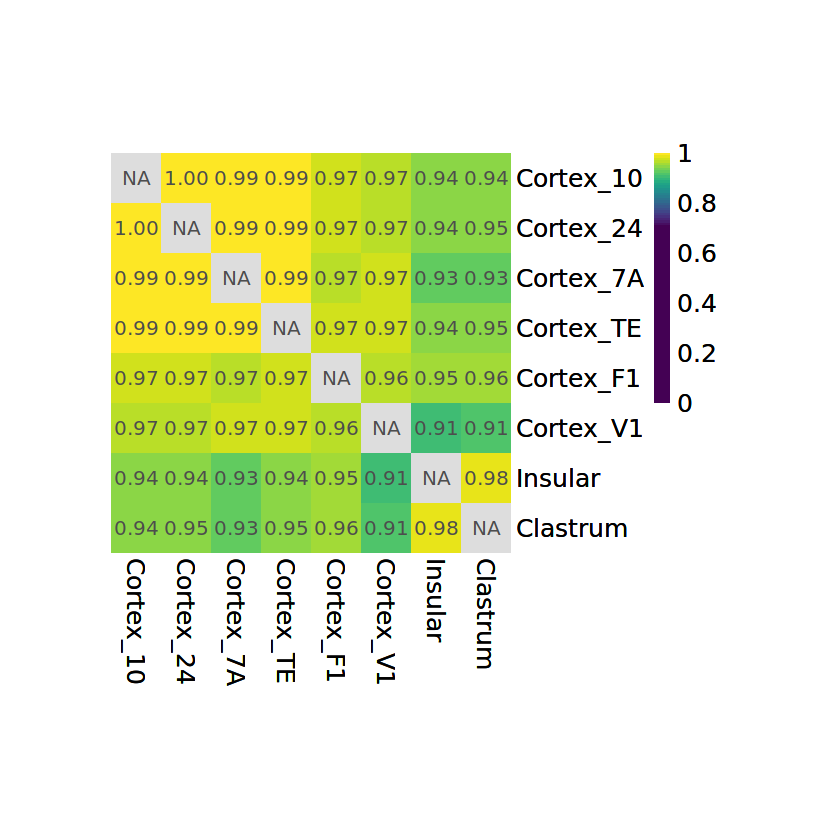

In [142]:
print_heatmap1('L5/6 IT')

[1] 1384

[1] 2807

[1] 2762

[1] 2735

[1] 2971

[1] 3114

[1] 2201

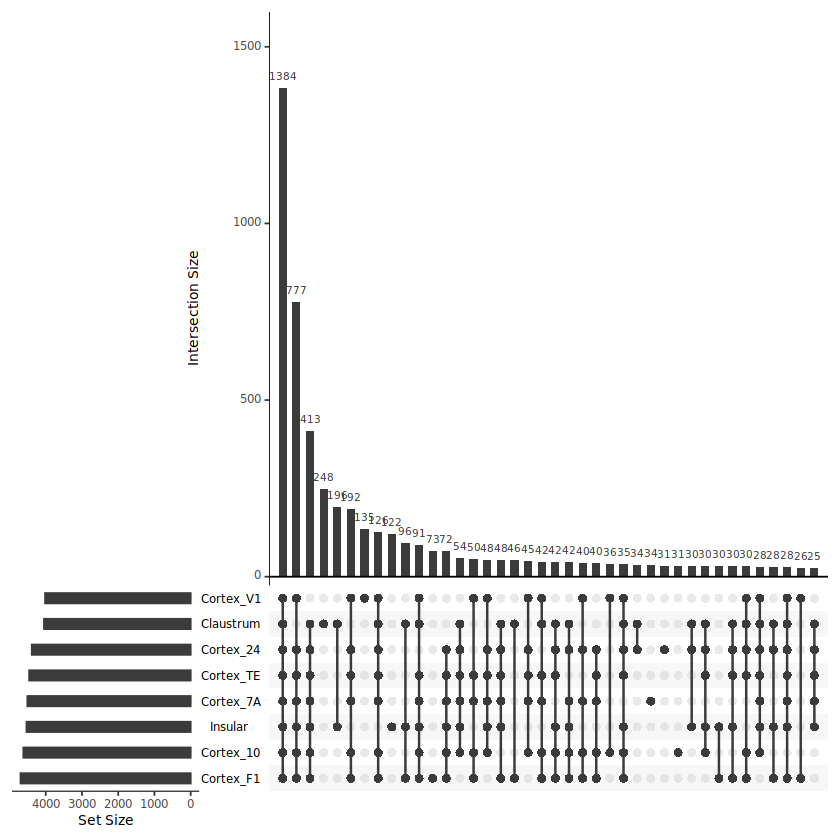

In [143]:
df_analysis=subclassFiltMarkerTb[subclassFiltMarkerTb$renew_cluster=='L5/6 IT Car3',]
nrow(subclassFiltMarkerTb[subclassFiltMarkerTb$renew_cluster=='L5/6 IT Car3' &
                          subclassFiltMarkerTb$conservedFlag=='conserved',])
pair=df_analysis$conservedSpeciesPair
length(pair[grep('Claustrum.*Cortex_10',pair)])
length(pair[grep('Claustrum.*24',pair)])
length(pair[grep('Claustrum.*7A',pair)])
length(pair[grep('Claustrum.*Cortex_F1',pair)])
length(pair[grep('Claustrum.*Insu',pair)])
length(pair[grep('Claustrum.*Cortex_V1',pair)])

df=as.data.frame(table(df_analysis$conservedSpeciesPair))

expressionInput=df$Freq
names(expressionInput)=as.character(df$Var1)
upset(fromExpression(expressionInput), order.by = "freq",nsets = 8)


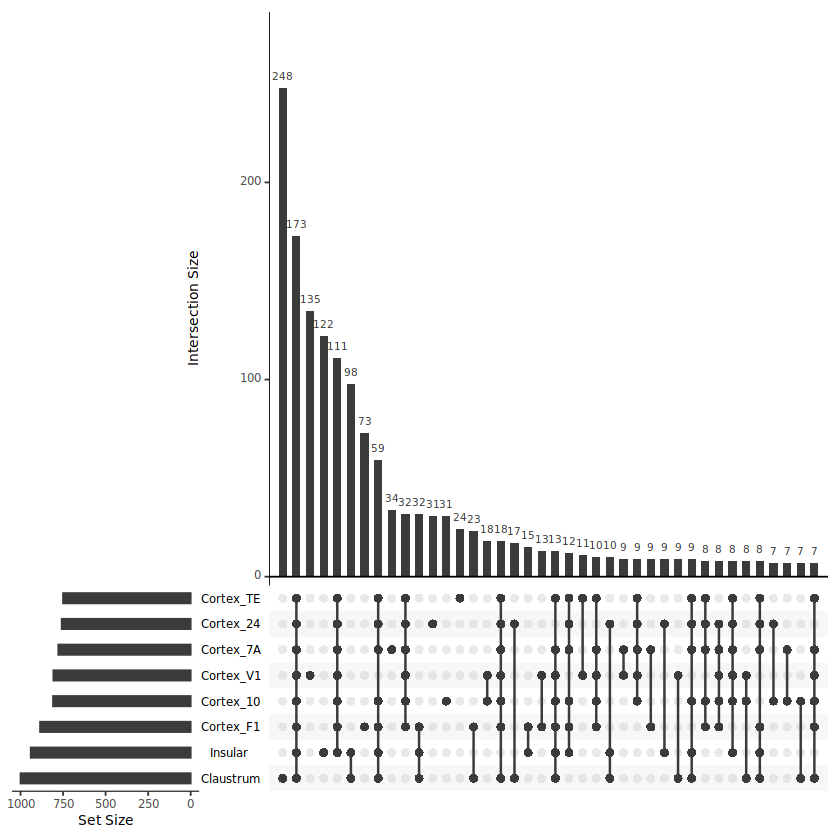

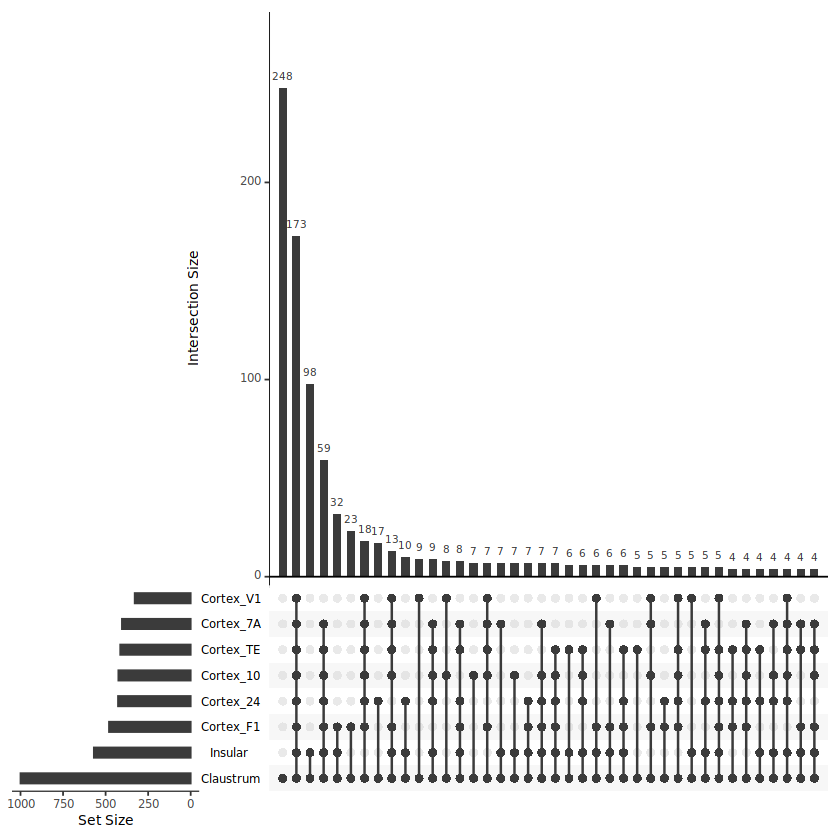

In [144]:
df$Freq_re=0
for(i in c(1:nrow(df))){
    df[i,]$Freq_re=length(unique(subclassFiltMarkerTb[subclassFiltMarkerTb$renew_cluster=='L5/6 IT Car3' & subclassFiltMarkerTb$conservedSpeciesPair==df[i,]$Var1,]$gene))
}

expressionInput=df$Freq_re
names(expressionInput)=as.character(df$Var1)
upset(fromExpression(expressionInput), order.by = "freq",nsets = 8)

df1=df[grep('Claustrum',df$Var1),]

expressionInput=df1$Freq_re
names(expressionInput)=as.character(df1$Var1)
upset(fromExpression(expressionInput), order.by = "freq",nsets = 8)


Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


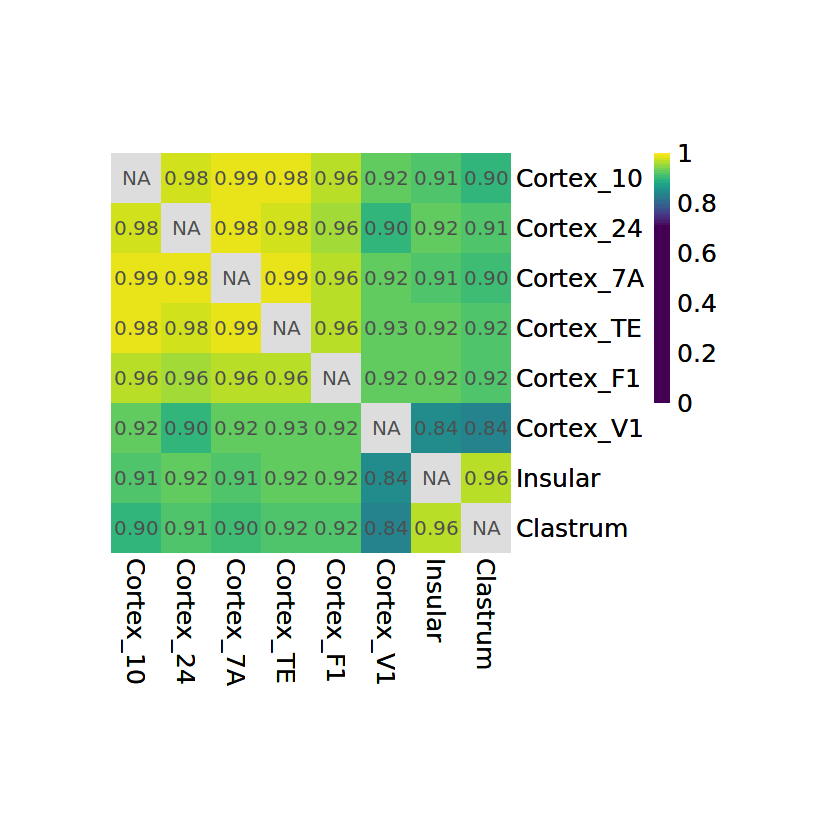

In [145]:
print_heatmap2('L5/6 IT Car3')


Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


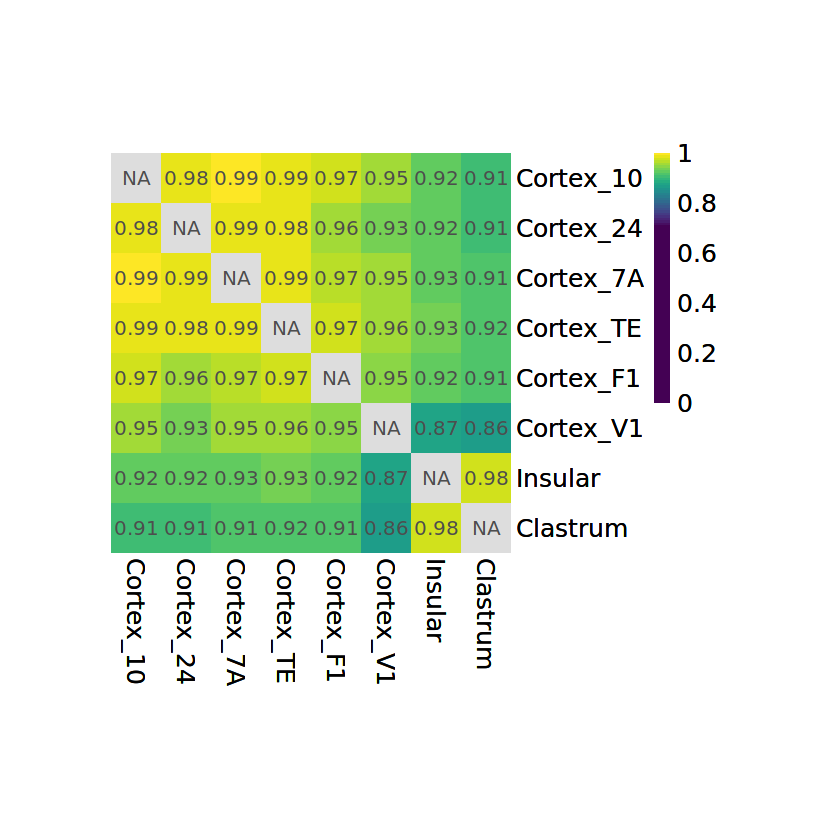

In [146]:
print_heatmap1('L5/6 IT Car3')

In [154]:
unique(insu_sub$renew_type2)

[1] "GLUT_L5 ET"        "GLUT_L4 IT"        "GLUT_L5/6 IT"     
 [4] "GLUT_L5/6 NP"      "GLUT_L5/6 IT Car3" "GLUT_L6 CT"       
 [7] "GLUT_L6b"          "GLUT_L2/3 IT"      "GABA_SST"         
[10] "GABA_LAMP5_LHX6"   "GABA_LAMP5"        "GABA_VIP"         
[13] "GABA_PVALB"        "GABA_RELN"         "GABA_CHC"

In [26]:
cla_sub$renew_type3=cla_sub$renew_type2
cla_sub@meta.data[cla_sub@meta.data$renew_type2=='EX_VENO_L6b',]$renew_type3='L6b'
cla_sub@meta.data[cla_sub@meta.data$renew_type2=='EX_VENO_L6CT',]$renew_type3='L6 CT'
cla_sub@meta.data[cla_sub@meta.data$renew_type2=='GLUT_GNB4-',]$renew_type3='L5/6 IT'
cla_sub@meta.data[cla_sub@meta.data$renew_type2=='GLUT_GNB4+',]$renew_type3='L5/6 IT Car3'
#cla_sub@meta.data$renew_type3=gsub('GABA_','',cla_sub@meta.data$renew_type2)



In [27]:
table(cla_sub$renew_type3)


       GABA_CHC       GABA_DRD2      GABA_LAMP5 GABA_LAMP5_LHX6      GABA_PVALB 
            300             300             300             300             300 
      GABA_RELN        GABA_SST        GABA_VIP         L5/6 IT    L5/6 IT Car3 
            300             300             300             300             300 
          L6 CT             L6b 
            300             300 

In [28]:
table(cla_sub$renew_type2)


    EX_VENO_L6b    EX_VENO_L6CT        GABA_CHC       GABA_DRD2      GABA_LAMP5 
            300             300             300             300             300 
GABA_LAMP5_LHX6      GABA_PVALB       GABA_RELN        GABA_SST        GABA_VIP 
            300             300             300             300             300 
     GLUT_GNB4-      GLUT_GNB4+ 
            300             300 

In [29]:
#把三个提取出来找差异 和F1比较像？？？
print_heatmap1=function(area){
    

Cortex_10_sct=subset(Cortex_10_sub,renew_type2==area)
Cortex_24_sct=subset(Cortex_24_sub,renew_type2==area)
Cortex_7A_sct=subset(Cortex_7A_sub,renew_type2==area)
Cortex_TE_sct=subset(Cortex_TE_sub,renew_type2==area)
Cortex_F1_sct=subset(Cortex_F1_sub,renew_type2==area)
Cortex_V1_sct=subset(Cortex_V1_sub,renew_type2==area)
area1=paste0('GLUT_',area)
cla_sct1=subset(cla_sub,renew_type3==area)
insu_sct=subset(insu_sub,renew_type2==area1)

    
all=unique(subclassFiltMarkerTb[subclassFiltMarkerTb$renew_cluster==area &
                          subclassFiltMarkerTb$conservedFlag=='conserved',]$gene)

all=intersect(all,rownames(Cortex_10_sct@assays$SCT@data))
all=intersect(all,rownames(insu_sct@assays$SCT@data))
all=intersect(all,rownames(cla_sct1@assays$SCT@data))

df=as.data.frame(Cortex_10_sct@assays$SCT@data[all,])
df_10=as.data.frame(apply(df,1,mean))
colnames(df_10)='Cortex_10'

df=as.data.frame(Cortex_24_sct@assays$SCT@data[all,])
df_24=as.data.frame(apply(df,1,mean))
colnames(df_24)='Cortex_24'

df=as.data.frame(Cortex_7A_sct@assays$SCT@data[all,])
df_7A=as.data.frame(apply(df,1,mean))
colnames(df_7A)='Cortex_7A'

df=as.data.frame(Cortex_TE_sct@assays$SCT@data[all,])
df_TE=as.data.frame(apply(df,1,mean))
colnames(df_TE)='Cortex_TE'

df=as.data.frame(Cortex_F1_sct@assays$SCT@data[all,])
df_F1=as.data.frame(apply(df,1,mean))
colnames(df_F1)='Cortex_F1'

df=as.data.frame(Cortex_V1_sct@assays$SCT@data[all,])
df_V1=as.data.frame(apply(df,1,mean))
colnames(df_V1)='Cortex_V1'

df=as.data.frame(insu_sct@assays$SCT@data[all,])
df_insu=as.data.frame(apply(df,1,mean))
colnames(df_insu)='Insular'

df=as.data.frame(cla_sct1@assays$SCT@data[all,])
df_cla=as.data.frame(apply(df,1,mean))
colnames(df_cla)='Clastrum'

all_df=cbind(df_10,df_24,df_7A,df_TE,df_F1,df_V1,df_insu,df_cla)


res.cor <- correlate(all_df)
res.cor=as.data.frame(res.cor)
rownames(res.cor)=res.cor$term
res.cor$term=NULL
options(repr.plot.width=7, repr.plot.height=7)
        rownames(res.cor)=gsub('Cortex_','',rownames(res.cor))
colnames(res.cor)=gsub('Cortex_','',colnames(res.cor))

p1=pheatmap(res.cor
, breaks=seq(0,1,0.01), cluster_rows=F, cluster_cols=F, border_color=NA, cellwidth=30, cellheight=30, fontsize=15,
        color = c(rep(viridis(100)[1],70),viridis(30)),display_numbers = T )
return(p1)
}



In [30]:
unique(Cortex_24_sub$renew_type2)
unique(cla_sub$renew_type2)
unique(insu_sub$renew_type2)


[1] "L6 CT"        "L6b"          "INSST"        "INRELN"       "L5/6 IT Car3"
 [6] "INLAMP5"      "INCHC"        "L5/6 IT"      "INPVALB"      "INVIP"

[1] "EX_VENO_L6b"     "GLUT_GNB4+"      "GLUT_GNB4-"      "EX_VENO_L6CT"   
 [5] "GABA_VIP"        "GABA_SST"        "GABA_CHC"        "GABA_RELN"      
 [9] "GABA_LAMP5"      "GABA_LAMP5_LHX6" "GABA_PVALB"      "GABA_DRD2"

[1] "GLUT_L5 ET"        "GLUT_L4 IT"        "GLUT_L5/6 IT"     
 [4] "GLUT_L5/6 NP"      "GLUT_L5/6 IT Car3" "GLUT_L6 CT"       
 [7] "GLUT_L6b"          "GLUT_L2/3 IT"      "GABA_SST"         
[10] "GABA_LAMP5_LHX6"   "GABA_LAMP5"        "GABA_VIP"         
[13] "GABA_PVALB"        "GABA_RELN"         "GABA_CHC"

In [31]:
unique(subclassFiltMarkerTb$renew_cluster)

[1] "L5/6 IT"      "L6b"          "L5/6 IT Car3" "PVALB"        "LAMP5"       
 [6] "L6 CT"        "CHC"          "SST"          "RELN"         "VIP"         
[11] "L5 ET"        "L2/3 IT"      "L4 IT"        "L5/6 NP"      "LAMP5_LHX6"  
[16] "DRD2"

In [32]:
#把三个提取出来找差异 和F1比较像？？？
print_heatmap2=function(area){
    

Cortex_10_sct=subset(Cortex_10_sub,renew_type2==area)
Cortex_24_sct=subset(Cortex_24_sub,renew_type2==area)
Cortex_7A_sct=subset(Cortex_7A_sub,renew_type2==area)
Cortex_TE_sct=subset(Cortex_TE_sub,renew_type2==area)
Cortex_F1_sct=subset(Cortex_F1_sub,renew_type2==area)
Cortex_V1_sct=subset(Cortex_V1_sub,renew_type2==area)
area1=paste0('GLUT_',area)
cla_sct1=subset(cla_sub,renew_type3==area)
insu_sct=subset(insu_sub,renew_type2==area1)

    
all=unique(subclassFiltMarkerTb[subclassFiltMarkerTb$renew_cluster==area,]$gene)

all=intersect(all,rownames(Cortex_10_sct@assays$SCT@data))
all=intersect(all,rownames(insu_sct@assays$SCT@data))
all=intersect(all,rownames(cla_sct1@assays$SCT@data))

df=as.data.frame(Cortex_10_sct@assays$SCT@data[all,])
df_10=as.data.frame(apply(df,1,mean))
colnames(df_10)='Cortex_10'

df=as.data.frame(Cortex_24_sct@assays$SCT@data[all,])
df_24=as.data.frame(apply(df,1,mean))
colnames(df_24)='Cortex_24'

df=as.data.frame(Cortex_7A_sct@assays$SCT@data[all,])
df_7A=as.data.frame(apply(df,1,mean))
colnames(df_7A)='Cortex_7A'

df=as.data.frame(Cortex_TE_sct@assays$SCT@data[all,])
df_TE=as.data.frame(apply(df,1,mean))
colnames(df_TE)='Cortex_TE'

df=as.data.frame(Cortex_F1_sct@assays$SCT@data[all,])
df_F1=as.data.frame(apply(df,1,mean))
colnames(df_F1)='Cortex_F1'

df=as.data.frame(Cortex_V1_sct@assays$SCT@data[all,])
df_V1=as.data.frame(apply(df,1,mean))
colnames(df_V1)='Cortex_V1'

df=as.data.frame(insu_sct@assays$SCT@data[all,])
df_insu=as.data.frame(apply(df,1,mean))
colnames(df_insu)='Insular'

df=as.data.frame(cla_sct1@assays$SCT@data[all,])
df_cla=as.data.frame(apply(df,1,mean))
colnames(df_cla)='Clastrum'

all_df=cbind(df_10,df_24,df_7A,df_TE,df_F1,df_V1,df_insu,df_cla)


res.cor <- correlate(all_df)
res.cor=as.data.frame(res.cor)
rownames(res.cor)=res.cor$term
res.cor$term=NULL
options(repr.plot.width=7, repr.plot.height=7)
        rownames(res.cor)=gsub('Cortex_','',rownames(res.cor))
colnames(res.cor)=gsub('Cortex_','',colnames(res.cor))

p1=pheatmap(res.cor
, breaks=seq(0,1,0.01), cluster_rows=F, cluster_cols=F, border_color=NA, cellwidth=30, cellheight=30, fontsize=15,
        color = c(rep(viridis(100)[1],70),viridis(30)),display_numbers = T )
return(p1)
}



In [35]:
#把三个提取出来找差异 和F1比较像？？？
print_heatmap1_df=function(area){
    

Cortex_10_sct=subset(Cortex_10_sub,renew_type2==area)
Cortex_24_sct=subset(Cortex_24_sub,renew_type2==area)
Cortex_7A_sct=subset(Cortex_7A_sub,renew_type2==area)
Cortex_TE_sct=subset(Cortex_TE_sub,renew_type2==area)
Cortex_F1_sct=subset(Cortex_F1_sub,renew_type2==area)
Cortex_V1_sct=subset(Cortex_V1_sub,renew_type2==area)
area1=paste0('GLUT_',area)
cla_sct1=subset(cla_sub,renew_type3==area)
insu_sct=subset(insu_sub,renew_type2==area1)

    
all=unique(subclassFiltMarkerTb[subclassFiltMarkerTb$renew_cluster==area &
                          subclassFiltMarkerTb$conservedFlag=='conserved',]$gene)

all=intersect(all,rownames(Cortex_10_sct@assays$SCT@data))
all=intersect(all,rownames(insu_sct@assays$SCT@data))
all=intersect(all,rownames(cla_sct1@assays$SCT@data))

df=as.data.frame(Cortex_10_sct@assays$SCT@data[all,])
df_10=as.data.frame(apply(df,1,mean))
colnames(df_10)='Cortex_10'

df=as.data.frame(Cortex_24_sct@assays$SCT@data[all,])
df_24=as.data.frame(apply(df,1,mean))
colnames(df_24)='Cortex_24'

df=as.data.frame(Cortex_7A_sct@assays$SCT@data[all,])
df_7A=as.data.frame(apply(df,1,mean))
colnames(df_7A)='Cortex_7A'

df=as.data.frame(Cortex_TE_sct@assays$SCT@data[all,])
df_TE=as.data.frame(apply(df,1,mean))
colnames(df_TE)='Cortex_TE'

df=as.data.frame(Cortex_F1_sct@assays$SCT@data[all,])
df_F1=as.data.frame(apply(df,1,mean))
colnames(df_F1)='Cortex_F1'

df=as.data.frame(Cortex_V1_sct@assays$SCT@data[all,])
df_V1=as.data.frame(apply(df,1,mean))
colnames(df_V1)='Cortex_V1'

df=as.data.frame(insu_sct@assays$SCT@data[all,])
df_insu=as.data.frame(apply(df,1,mean))
colnames(df_insu)='Insular'

df=as.data.frame(cla_sct1@assays$SCT@data[all,])
df_cla=as.data.frame(apply(df,1,mean))
colnames(df_cla)='Clastrum'

all_df=cbind(df_10,df_24,df_7A,df_TE,df_F1,df_V1,df_insu,df_cla)


res.cor <- correlate(all_df)
res.cor=as.data.frame(res.cor)
rownames(res.cor)=res.cor$term
res.cor$term=NULL
options(repr.plot.width=7, repr.plot.height=7)
        rownames(res.cor)=gsub('Cortex_','',rownames(res.cor))
colnames(res.cor)=gsub('Cortex_','',colnames(res.cor))
return(res.cor)
}



In [36]:
#把三个提取出来找差异 和F1比较像？？？
print_heatmap2_df=function(area){
    

Cortex_10_sct=subset(Cortex_10_sub,renew_type2==area)
Cortex_24_sct=subset(Cortex_24_sub,renew_type2==area)
Cortex_7A_sct=subset(Cortex_7A_sub,renew_type2==area)
Cortex_TE_sct=subset(Cortex_TE_sub,renew_type2==area)
Cortex_F1_sct=subset(Cortex_F1_sub,renew_type2==area)
Cortex_V1_sct=subset(Cortex_V1_sub,renew_type2==area)
area1=paste0('GLUT_',area)
cla_sct1=subset(cla_sub,renew_type3==area)
insu_sct=subset(insu_sub,renew_type2==area1)

    
all=unique(subclassFiltMarkerTb[subclassFiltMarkerTb$renew_cluster==area,]$gene)

all=intersect(all,rownames(Cortex_10_sct@assays$SCT@data))
all=intersect(all,rownames(insu_sct@assays$SCT@data))
all=intersect(all,rownames(cla_sct1@assays$SCT@data))

df=as.data.frame(Cortex_10_sct@assays$SCT@data[all,])
df_10=as.data.frame(apply(df,1,mean))
colnames(df_10)='Cortex_10'

df=as.data.frame(Cortex_24_sct@assays$SCT@data[all,])
df_24=as.data.frame(apply(df,1,mean))
colnames(df_24)='Cortex_24'

df=as.data.frame(Cortex_7A_sct@assays$SCT@data[all,])
df_7A=as.data.frame(apply(df,1,mean))
colnames(df_7A)='Cortex_7A'

df=as.data.frame(Cortex_TE_sct@assays$SCT@data[all,])
df_TE=as.data.frame(apply(df,1,mean))
colnames(df_TE)='Cortex_TE'

df=as.data.frame(Cortex_F1_sct@assays$SCT@data[all,])
df_F1=as.data.frame(apply(df,1,mean))
colnames(df_F1)='Cortex_F1'

df=as.data.frame(Cortex_V1_sct@assays$SCT@data[all,])
df_V1=as.data.frame(apply(df,1,mean))
colnames(df_V1)='Cortex_V1'

df=as.data.frame(insu_sct@assays$SCT@data[all,])
df_insu=as.data.frame(apply(df,1,mean))
colnames(df_insu)='Insular'

df=as.data.frame(cla_sct1@assays$SCT@data[all,])
df_cla=as.data.frame(apply(df,1,mean))
colnames(df_cla)='Clastrum'

all_df=cbind(df_10,df_24,df_7A,df_TE,df_F1,df_V1,df_insu,df_cla)


res.cor <- correlate(all_df)
res.cor=as.data.frame(res.cor)
rownames(res.cor)=res.cor$term
res.cor$term=NULL
options(repr.plot.width=7, repr.plot.height=7)
        rownames(res.cor)=gsub('Cortex_','',rownames(res.cor))
colnames(res.cor)=gsub('Cortex_','',colnames(res.cor))
return(res.cor)
}



In [37]:
print_heatmap2_df('L6b')

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


,10,24,7A,TE,F1,V1,Insular,Clastrum
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,NA,0.9733226,0.9814785,0.9878697,0.9678261,0.9495333,0.9260810,0.8946065
24,0.9733226,NA,0.9649306,0.9688343,0.9464236,0.9336752,0.9084013,0.8789586
7A,0.9814785,0.9649306,NA,0.9852106,0.9622728,0.9664968,0.8999656,0.8646038
TE,0.9878697,0.9688343,0.9852106,NA,0.9676077,0.9566865,0.9268765,0.8969762
F1,0.9678261,0.9464236,0.9622728,0.9676077,NA,0.9508013,0.9260626,0.9010864
V1,0.9495333,0.9336752,0.9664968,0.9566865,0.9508013,NA,0.8770874,0.8559353
Insular,0.9260810,0.9084013,0.8999656,0.9268765,0.9260626,0.8770874,NA,0.9543320
Clastrum,0.8946065,0.8789586,0.8646038,0.8969762,0.9010864,0.8559353,0.9543320,NA


Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


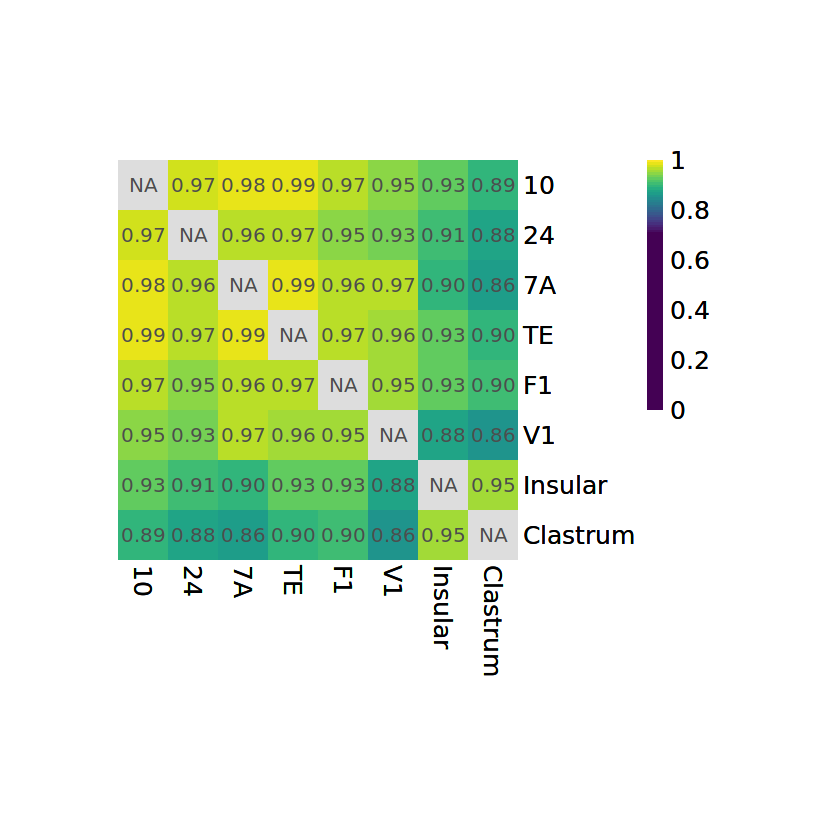

In [34]:
print_heatmap2('L6b')


In [156]:
unique(subclassFiltMarkerTb$renew_cluster)

[1] "L5/6 IT"      "L6b"          "L5/6 IT Car3" "PVALB"        "LAMP5"       
 [6] "L6 CT"        "CHC"          "SST"          "RELN"         "VIP"         
[11] "L5 ET"        "L2/3 IT"      "L4 IT"        "L5/6 NP"      "LAMP5_LHX6"  
[16] "DRD2"

In [40]:
#把三个提取出来找差异 和F1比较像？？？
print_heatmap_in1=function(area){
    

Cortex_10_sct=subset(Cortex_10_sub,renew_type2==area)
Cortex_24_sct=subset(Cortex_24_sub,renew_type2==area)
Cortex_7A_sct=subset(Cortex_7A_sub,renew_type2==area)
Cortex_TE_sct=subset(Cortex_TE_sub,renew_type2==area)
Cortex_F1_sct=subset(Cortex_F1_sub,renew_type2==area)
Cortex_V1_sct=subset(Cortex_V1_sub,renew_type2==area)
area1=gsub('IN','GABA_',area)
cla_sct1=subset(cla_sub,renew_type3==area1)
insu_sct=subset(insu_sub,renew_type2==area1)

area2=gsub('IN','',area)
all=unique(subclassFiltMarkerTb[subclassFiltMarkerTb$renew_cluster==area2 &
                          subclassFiltMarkerTb$conservedFlag=='conserved',]$gene)

all=intersect(all,rownames(Cortex_10_sct@assays$SCT@data))
all=intersect(all,rownames(insu_sct@assays$SCT@data))
all=intersect(all,rownames(cla_sct1@assays$SCT@data))

df=as.data.frame(Cortex_10_sct@assays$SCT@data[all,])
df_10=as.data.frame(apply(df,1,mean))
colnames(df_10)='Cortex_10'

df=as.data.frame(Cortex_24_sct@assays$SCT@data[all,])
df_24=as.data.frame(apply(df,1,mean))
colnames(df_24)='Cortex_24'

df=as.data.frame(Cortex_7A_sct@assays$SCT@data[all,])
df_7A=as.data.frame(apply(df,1,mean))
colnames(df_7A)='Cortex_7A'

df=as.data.frame(Cortex_TE_sct@assays$SCT@data[all,])
df_TE=as.data.frame(apply(df,1,mean))
colnames(df_TE)='Cortex_TE'

df=as.data.frame(Cortex_F1_sct@assays$SCT@data[all,])
df_F1=as.data.frame(apply(df,1,mean))
colnames(df_F1)='Cortex_F1'

df=as.data.frame(Cortex_V1_sct@assays$SCT@data[all,])
df_V1=as.data.frame(apply(df,1,mean))
colnames(df_V1)='Cortex_V1'

df=as.data.frame(insu_sct@assays$SCT@data[all,])
df_insu=as.data.frame(apply(df,1,mean))
colnames(df_insu)='Insular'

df=as.data.frame(cla_sct1@assays$SCT@data[all,])
df_cla=as.data.frame(apply(df,1,mean))
colnames(df_cla)='Clastrum'

all_df=cbind(df_10,df_24,df_7A,df_TE,df_F1,df_V1,df_insu,df_cla)


res.cor <- correlate(all_df)
res.cor=as.data.frame(res.cor)
rownames(res.cor)=res.cor$term
res.cor$term=NULL
options(repr.plot.width=7, repr.plot.height=7)
    rownames(res.cor)=gsub('Cortex_','',rownames(res.cor))
colnames(res.cor)=gsub('Cortex_','',colnames(res.cor))

p1=pheatmap(res.cor
, breaks=seq(0,1,0.01), cluster_rows=F, cluster_cols=F, border_color=NA, cellwidth=30, cellheight=30, fontsize=15,
        color = c(rep(viridis(100)[1],70),viridis(30)),display_numbers = T )
return(p1)
}



In [42]:
#把三个提取出来找差异 和F1比较像？？？
print_heatmap_in1_df=function(area){
    

Cortex_10_sct=subset(Cortex_10_sub,renew_type2==area)
Cortex_24_sct=subset(Cortex_24_sub,renew_type2==area)
Cortex_7A_sct=subset(Cortex_7A_sub,renew_type2==area)
Cortex_TE_sct=subset(Cortex_TE_sub,renew_type2==area)
Cortex_F1_sct=subset(Cortex_F1_sub,renew_type2==area)
Cortex_V1_sct=subset(Cortex_V1_sub,renew_type2==area)
area1=gsub('IN','GABA_',area)
cla_sct1=subset(cla_sub,renew_type3==area1)
insu_sct=subset(insu_sub,renew_type2==area1)

area2=gsub('IN','',area)
all=unique(subclassFiltMarkerTb[subclassFiltMarkerTb$renew_cluster==area2 &
                          subclassFiltMarkerTb$conservedFlag=='conserved',]$gene)

all=intersect(all,rownames(Cortex_10_sct@assays$SCT@data))
all=intersect(all,rownames(insu_sct@assays$SCT@data))
all=intersect(all,rownames(cla_sct1@assays$SCT@data))

df=as.data.frame(Cortex_10_sct@assays$SCT@data[all,])
df_10=as.data.frame(apply(df,1,mean))
colnames(df_10)='Cortex_10'

df=as.data.frame(Cortex_24_sct@assays$SCT@data[all,])
df_24=as.data.frame(apply(df,1,mean))
colnames(df_24)='Cortex_24'

df=as.data.frame(Cortex_7A_sct@assays$SCT@data[all,])
df_7A=as.data.frame(apply(df,1,mean))
colnames(df_7A)='Cortex_7A'

df=as.data.frame(Cortex_TE_sct@assays$SCT@data[all,])
df_TE=as.data.frame(apply(df,1,mean))
colnames(df_TE)='Cortex_TE'

df=as.data.frame(Cortex_F1_sct@assays$SCT@data[all,])
df_F1=as.data.frame(apply(df,1,mean))
colnames(df_F1)='Cortex_F1'

df=as.data.frame(Cortex_V1_sct@assays$SCT@data[all,])
df_V1=as.data.frame(apply(df,1,mean))
colnames(df_V1)='Cortex_V1'

df=as.data.frame(insu_sct@assays$SCT@data[all,])
df_insu=as.data.frame(apply(df,1,mean))
colnames(df_insu)='Insular'

df=as.data.frame(cla_sct1@assays$SCT@data[all,])
df_cla=as.data.frame(apply(df,1,mean))
colnames(df_cla)='Clastrum'

all_df=cbind(df_10,df_24,df_7A,df_TE,df_F1,df_V1,df_insu,df_cla)


res.cor <- correlate(all_df)
res.cor=as.data.frame(res.cor)
rownames(res.cor)=res.cor$term
res.cor$term=NULL
options(repr.plot.width=7, repr.plot.height=7)
    rownames(res.cor)=gsub('Cortex_','',rownames(res.cor))
colnames(res.cor)=gsub('Cortex_','',colnames(res.cor))
return(res.cor)
}



In [41]:
#把三个提取出来找差异 和F1比较像？？？
print_heatmap_in2=function(area){
    

Cortex_10_sct=subset(Cortex_10_sub,renew_type2==area)
Cortex_24_sct=subset(Cortex_24_sub,renew_type2==area)
Cortex_7A_sct=subset(Cortex_7A_sub,renew_type2==area)
Cortex_TE_sct=subset(Cortex_TE_sub,renew_type2==area)
Cortex_F1_sct=subset(Cortex_F1_sub,renew_type2==area)
Cortex_V1_sct=subset(Cortex_V1_sub,renew_type2==area)
area1=gsub('IN','GABA_',area)
cla_sct1=subset(cla_sub,renew_type3==area1)
insu_sct=subset(insu_sub,renew_type2==area1)

area2=gsub('IN','',area)
all=unique(subclassFiltMarkerTb[subclassFiltMarkerTb$renew_cluster==area,]$gene)

all=intersect(all,rownames(Cortex_10_sct@assays$SCT@data))
all=intersect(all,rownames(insu_sct@assays$SCT@data))
all=intersect(all,rownames(cla_sct1@assays$SCT@data))

df=as.data.frame(Cortex_10_sct@assays$SCT@data[all,])
df_10=as.data.frame(apply(df,1,mean))
colnames(df_10)='Cortex_10'

df=as.data.frame(Cortex_24_sct@assays$SCT@data[all,])
df_24=as.data.frame(apply(df,1,mean))
colnames(df_24)='Cortex_24'

df=as.data.frame(Cortex_7A_sct@assays$SCT@data[all,])
df_7A=as.data.frame(apply(df,1,mean))
colnames(df_7A)='Cortex_7A'

df=as.data.frame(Cortex_TE_sct@assays$SCT@data[all,])
df_TE=as.data.frame(apply(df,1,mean))
colnames(df_TE)='Cortex_TE'

df=as.data.frame(Cortex_F1_sct@assays$SCT@data[all,])
df_F1=as.data.frame(apply(df,1,mean))
colnames(df_F1)='Cortex_F1'

df=as.data.frame(Cortex_V1_sct@assays$SCT@data[all,])
df_V1=as.data.frame(apply(df,1,mean))
colnames(df_V1)='Cortex_V1'

df=as.data.frame(insu_sct@assays$SCT@data[all,])
df_insu=as.data.frame(apply(df,1,mean))
colnames(df_insu)='Insular'

df=as.data.frame(cla_sct1@assays$SCT@data[all,])
df_cla=as.data.frame(apply(df,1,mean))
colnames(df_cla)='Clastrum'

all_df=cbind(df_10,df_24,df_7A,df_TE,df_F1,df_V1,df_insu,df_cla)


res.cor <- correlate(all_df)
res.cor=as.data.frame(res.cor)
rownames(res.cor)=res.cor$term
res.cor$term=NULL
options(repr.plot.width=7, repr.plot.height=7)
rownames(res.cor)=gsub('Cortex_','',rownames(res.cor))
colnames(res.cor)=gsub('Cortex_','',colnames(res.cor))
p1=pheatmap(res.cor
, breaks=seq(0,1,0.01), cluster_rows=F, cluster_cols=F, border_color=NA, cellwidth=30, cellheight=30, fontsize=15,
        color = c(rep(viridis(100)[1],70),viridis(30)),display_numbers = T )
return(p1)
}



In [43]:
#把三个提取出来找差异 和F1比较像？？？
print_heatmap_in2_df=function(area){
    

Cortex_10_sct=subset(Cortex_10_sub,renew_type2==area)
Cortex_24_sct=subset(Cortex_24_sub,renew_type2==area)
Cortex_7A_sct=subset(Cortex_7A_sub,renew_type2==area)
Cortex_TE_sct=subset(Cortex_TE_sub,renew_type2==area)
Cortex_F1_sct=subset(Cortex_F1_sub,renew_type2==area)
Cortex_V1_sct=subset(Cortex_V1_sub,renew_type2==area)
area1=gsub('IN','GABA_',area)
cla_sct1=subset(cla_sub,renew_type3==area1)
insu_sct=subset(insu_sub,renew_type2==area1)

area2=gsub('IN','',area)
all=unique(subclassFiltMarkerTb[subclassFiltMarkerTb$renew_cluster==area,]$gene)

all=intersect(all,rownames(Cortex_10_sct@assays$SCT@data))
all=intersect(all,rownames(insu_sct@assays$SCT@data))
all=intersect(all,rownames(cla_sct1@assays$SCT@data))

df=as.data.frame(Cortex_10_sct@assays$SCT@data[all,])
df_10=as.data.frame(apply(df,1,mean))
colnames(df_10)='Cortex_10'

df=as.data.frame(Cortex_24_sct@assays$SCT@data[all,])
df_24=as.data.frame(apply(df,1,mean))
colnames(df_24)='Cortex_24'

df=as.data.frame(Cortex_7A_sct@assays$SCT@data[all,])
df_7A=as.data.frame(apply(df,1,mean))
colnames(df_7A)='Cortex_7A'

df=as.data.frame(Cortex_TE_sct@assays$SCT@data[all,])
df_TE=as.data.frame(apply(df,1,mean))
colnames(df_TE)='Cortex_TE'

df=as.data.frame(Cortex_F1_sct@assays$SCT@data[all,])
df_F1=as.data.frame(apply(df,1,mean))
colnames(df_F1)='Cortex_F1'

df=as.data.frame(Cortex_V1_sct@assays$SCT@data[all,])
df_V1=as.data.frame(apply(df,1,mean))
colnames(df_V1)='Cortex_V1'

df=as.data.frame(insu_sct@assays$SCT@data[all,])
df_insu=as.data.frame(apply(df,1,mean))
colnames(df_insu)='Insular'

df=as.data.frame(cla_sct1@assays$SCT@data[all,])
df_cla=as.data.frame(apply(df,1,mean))
colnames(df_cla)='Clastrum'

all_df=cbind(df_10,df_24,df_7A,df_TE,df_F1,df_V1,df_insu,df_cla)


res.cor <- correlate(all_df)
res.cor=as.data.frame(res.cor)
rownames(res.cor)=res.cor$term
res.cor$term=NULL
options(repr.plot.width=7, repr.plot.height=7)
rownames(res.cor)=gsub('Cortex_','',rownames(res.cor))
colnames(res.cor)=gsub('Cortex_','',colnames(res.cor))
return(res.cor)
}



Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'
Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


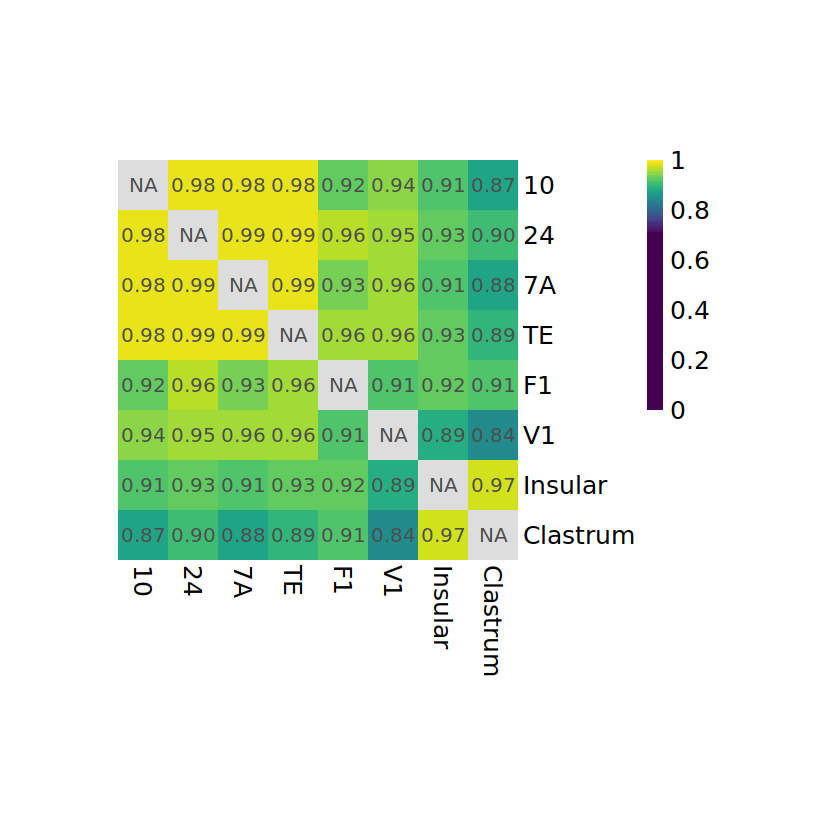

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


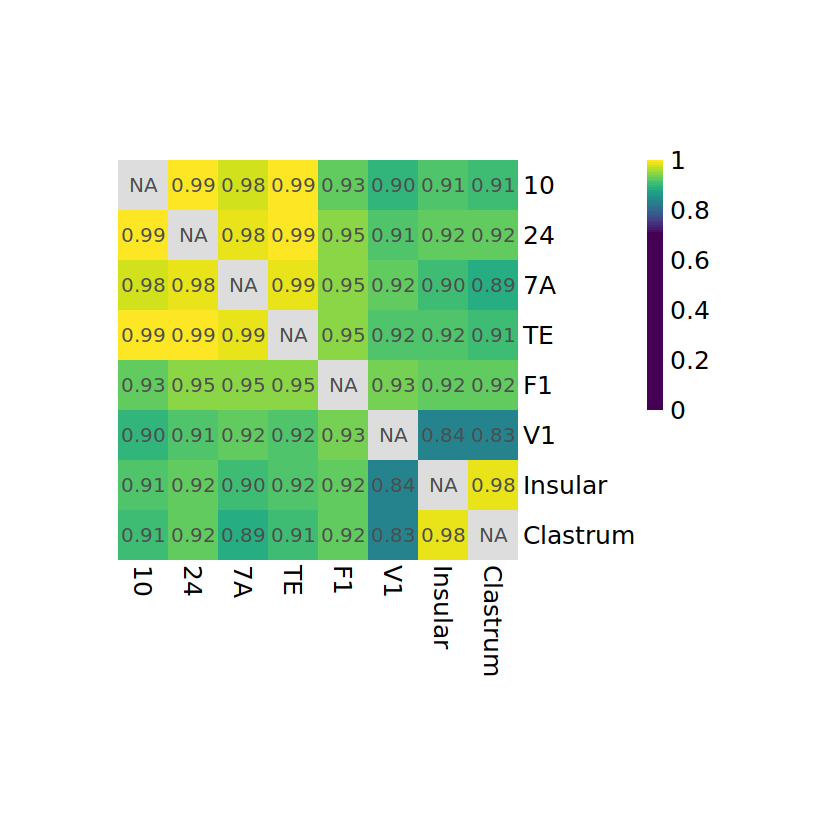

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


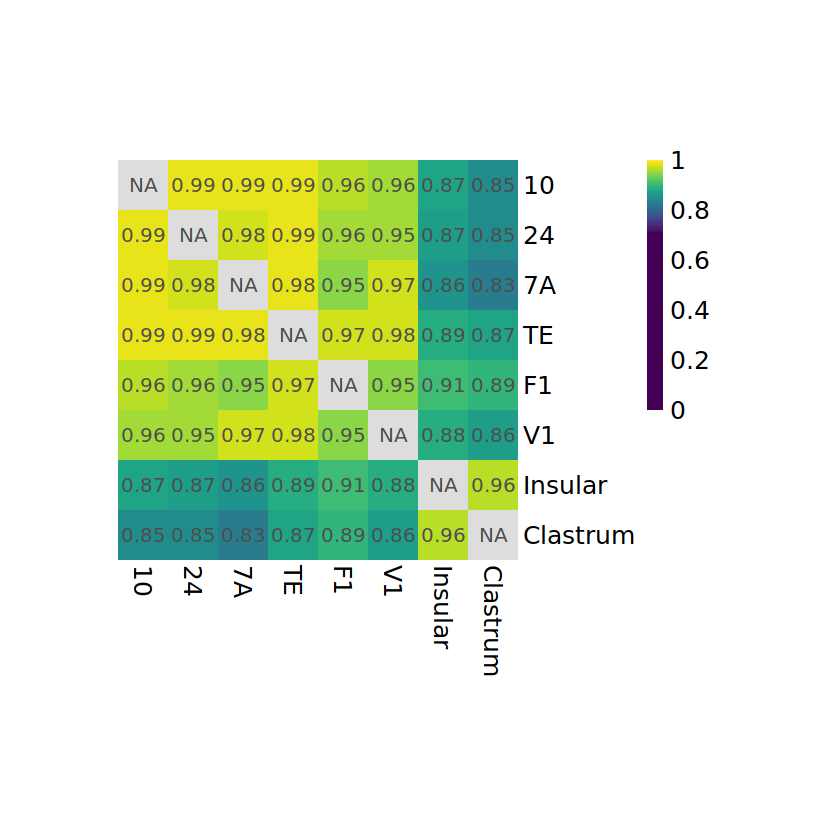

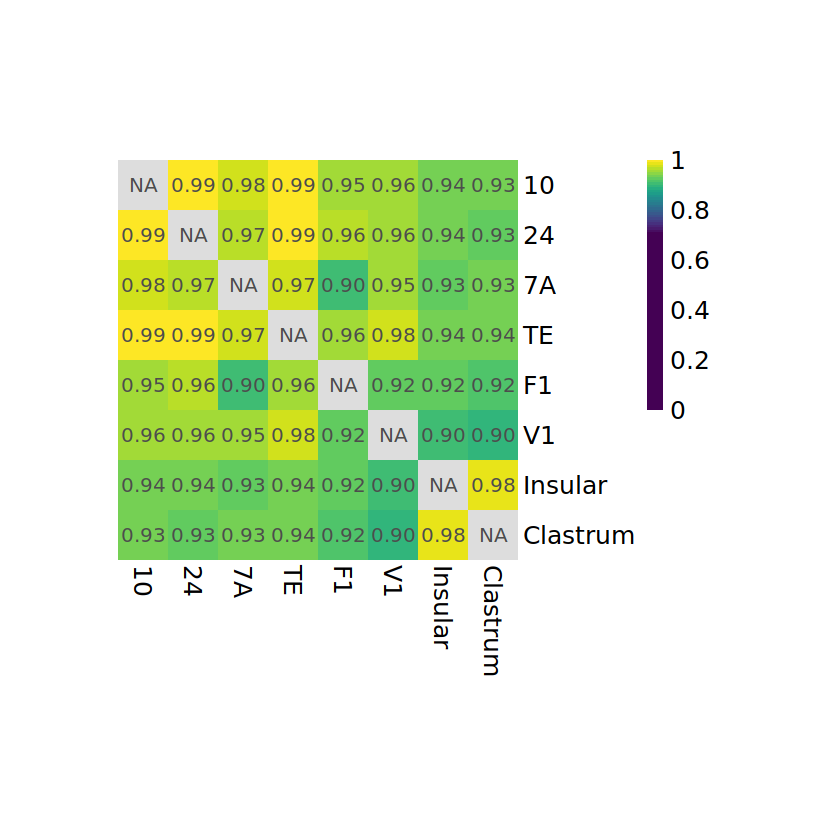

In [200]:
p_sst=print_heatmap_in1('INSST')
p_pv=print_heatmap_in1('INPVALB')
p_lamp=print_heatmap_in1('INLAMP5')
p_vip=print_heatmap_in1('INVIP')

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'
Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


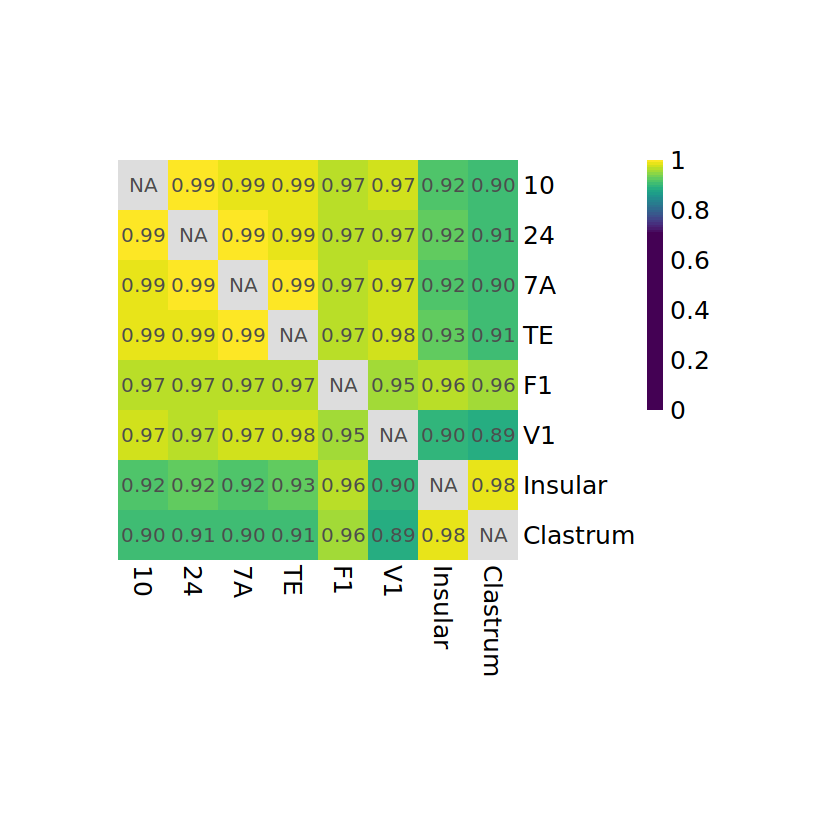

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


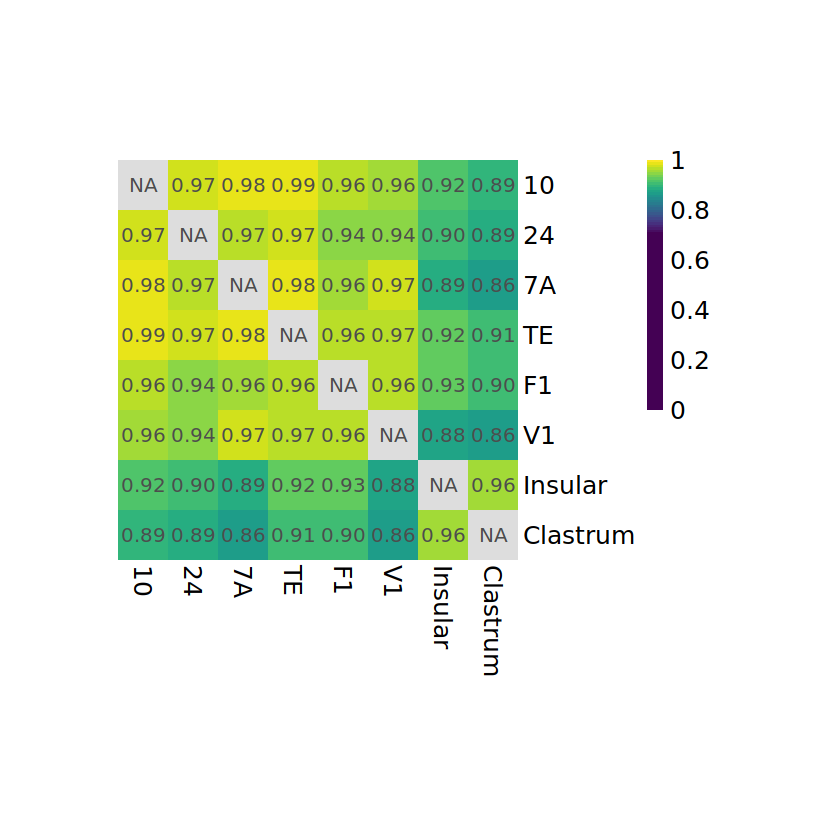

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


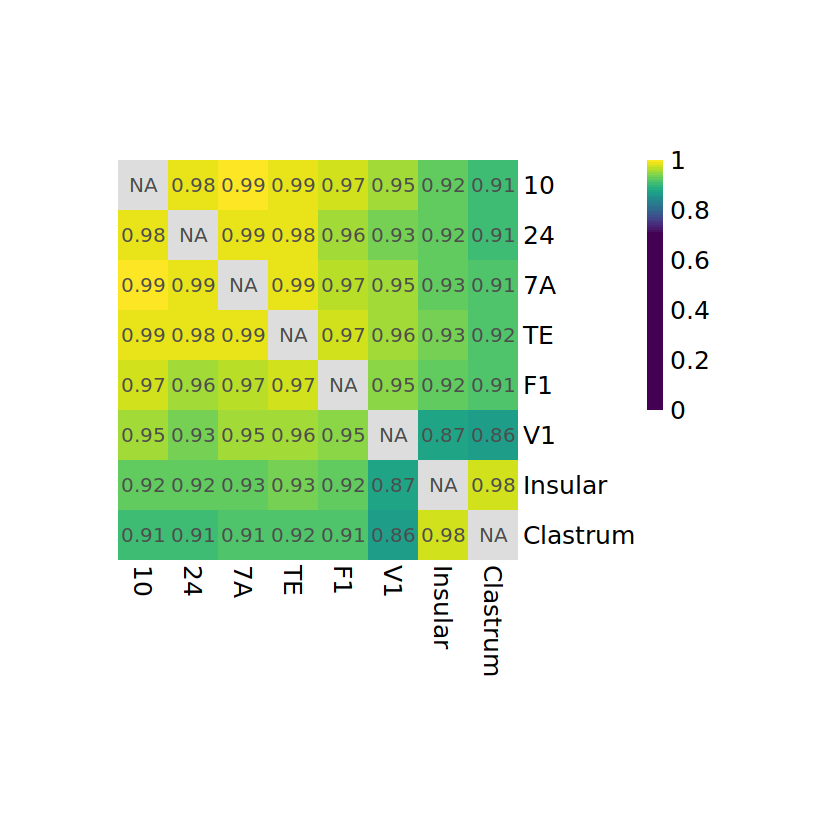

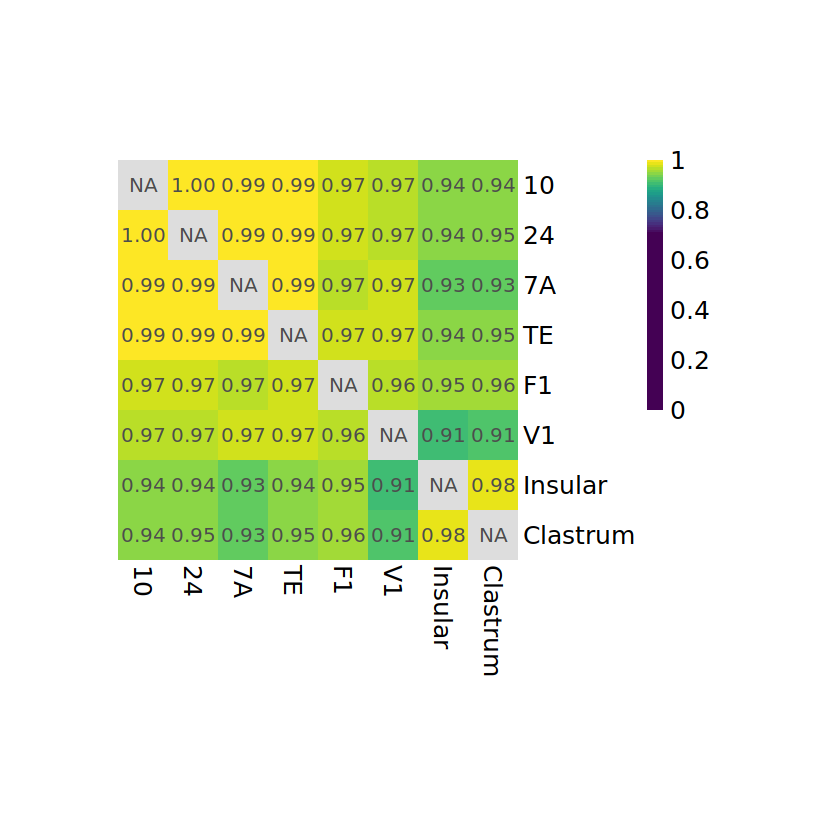

In [201]:
p_ct=print_heatmap1('L6 CT')
p_6b=print_heatmap1('L6b')
p_car3=print_heatmap1('L5/6 IT Car3')
p_56it=print_heatmap1('L5/6 IT')

In [205]:
save_pheatmap_pdf <- function(x, filename, width=15, height=15) {
  stopifnot(!missing(x))
  stopifnot(!missing(filename))
  pdf(filename, width=width, height=height)
  grid::grid.newpage()
  grid::grid.draw(x$gtable)
  dev.off()
}
save_pheatmap_pdf(p_ct,"/home/liuyx/liuyuxuan/spa_seurat/cla/fig_1206/area_compare_240118/p_ct.pdf",7,7)
save_pheatmap_pdf(p_6b,"/home/liuyx/liuyuxuan/spa_seurat/cla/fig_1206/area_compare_240118/p_6b.pdf",7,7)
save_pheatmap_pdf(p_car3,"/home/liuyx/liuyuxuan/spa_seurat/cla/fig_1206/area_compare_240118/p_car3.pdf",7,7)
save_pheatmap_pdf(p_56it,"/home/liuyx/liuyuxuan/spa_seurat/cla/fig_1206/area_compare_240118/p_56it.pdf",7,7)


save_pheatmap_pdf(p_sst,"/home/liuyx/liuyuxuan/spa_seurat/cla/fig_1206/area_compare_240118/p_sst.pdf",7,7)
save_pheatmap_pdf(p_pv,"/home/liuyx/liuyuxuan/spa_seurat/cla/fig_1206/area_compare_240118/p_pv.pdf",7,7)
save_pheatmap_pdf(p_lamp,"/home/liuyx/liuyuxuan/spa_seurat/cla/fig_1206/area_compare_240118/p_lamp.pdf",7,7)
save_pheatmap_pdf(p_vip,"/home/liuyx/liuyuxuan/spa_seurat/cla/fig_1206/area_compare_240118/p_vip.pdf",7,7)


png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

In [44]:
p_sst=print_heatmap_in1_df('INSST')
p_pv=print_heatmap_in1_df('INPVALB')
p_lamp=print_heatmap_in1_df('INLAMP5')
p_vip=print_heatmap_in1_df('INVIP')

p_ct=print_heatmap1_df('L6 CT')
p_6b=print_heatmap1_df('L6b')
p_car3=print_heatmap1_df('L5/6 IT Car3')
p_56it=print_heatmap1_df('L5/6 IT')


Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'
Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'
Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'
Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'
Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'
Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'
Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'
Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


In [100]:
p_sst=print_heatmap_in2_df('INSST')
p_pv=print_heatmap_in2_df('INPVALB')
p_lamp=print_heatmap_in2_df('INLAMP5')
p_vip=print_heatmap_in2_df('INVIP')

p_ct=print_heatmap2_df('L6 CT')
p_6b=print_heatmap2_df('L6b')
p_car3=print_heatmap2_df('L5/6 IT Car3')
p_56it=print_heatmap2_df('L5/6 IT')


ERROR: Error in stats::cor(x = x, y = y, use = use, method = method): 'x' is empty


In [ ]:
df_col=read.csv('/home/liuyx/liuyuxuan/spa_seurat/cla/macaca/sn_0821_renew_batch3_all/batch_normalize_renew_0105/post_analysis/data/color_supercluster.csv')
df_col=rbind(df_col,c('GLUT_VENO_L6CT','green'))
df_col=rbind(df_col,c('GLUT_VENO_L6b','darkgreen'))


pale_all=df_col$pale
names(pale_all)=df_col$X



In [ ]:
sst_df=as.data.frame(t(p_sst['Clastrum',]))
sst_df$type='GABA_SST'
sst_df$area=rownames(sst_df)
pv_df=as.data.frame(t(p_pv['Clastrum',]))
pv_df$type='GABA_PVALB'
pv_df$area=rownames(pv_df)
lamp_df=as.data.frame(t(p_lamp['Clastrum',]))
lamp_df$type='GABA_LAMP5'
lamp_df$area=rownames(lamp_df)
vip_df=as.data.frame(t(p_vip['Clastrum',]))
vip_df$type='GABA_VIP'
vip_df$area=rownames(vip_df)

ct_df=as.data.frame(t(p_ct['Clastrum',]))
ct_df$type='GLUT_VENO_L6CT'
ct_df$area=rownames(ct_df)
l6b_df=as.data.frame(t(p_6b['Clastrum',]))
l6b_df$type='GLUT_VENO_L6b'
l6b_df$area=rownames(l6b_df)
car_df=as.data.frame(t(p_car3['Clastrum',]))
car_df$type='GLUT_GNB4+'
car_df$area=rownames(car_df)
l56it_df=as.data.frame(t(p_56it['Clastrum',]))
l56it_df$type='GLUT_GNB4-'
l56it_df$area=rownames(l56it_df)
print_df=rbind(sst_df,pv_df,lamp_df,vip_df,
              ct_df,l6b_df,car_df,l56it_df)
head(print_df)
print_df=print_df[!is.na(print_df$Clastrum),]
print_df$Clastrum=as.numeric(print_df$Clastrum)

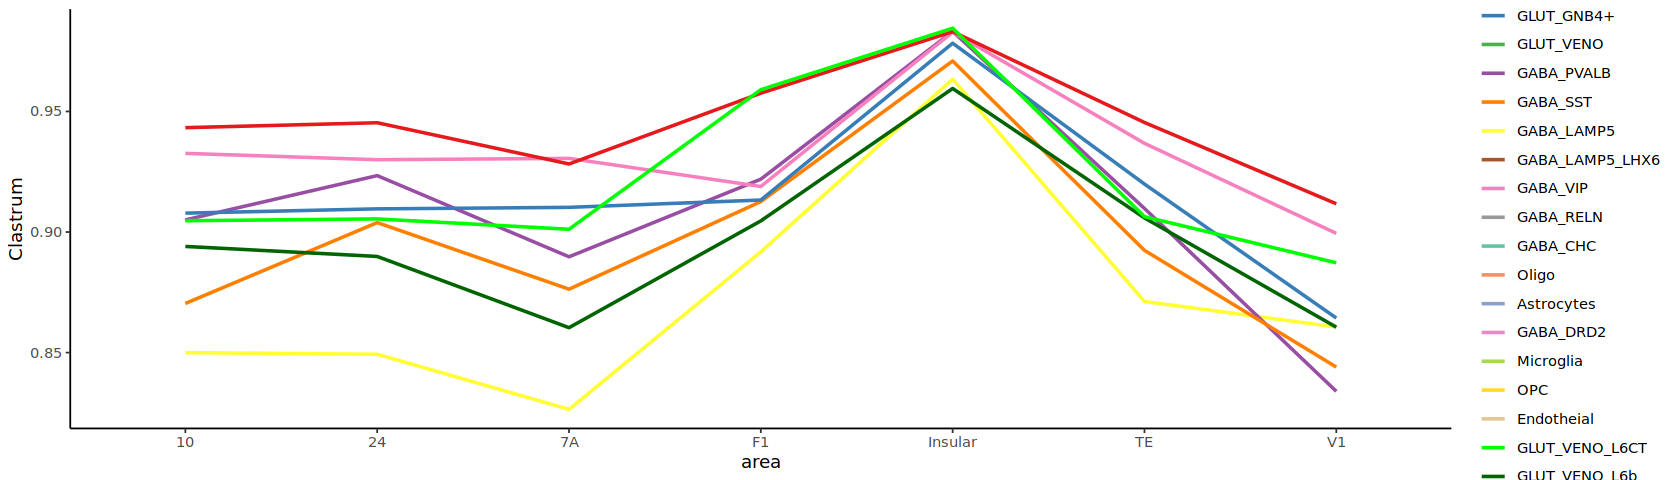

In [101]:
options(repr.plot.width=14, repr.plot.height=4)
gp2=ggplot(data=print_df,aes(x=area, y=Clastrum, group=type,color=type))+
  scale_color_manual(values = pale_all)+
    geom_line(size =1)+theme_classic()
gp2

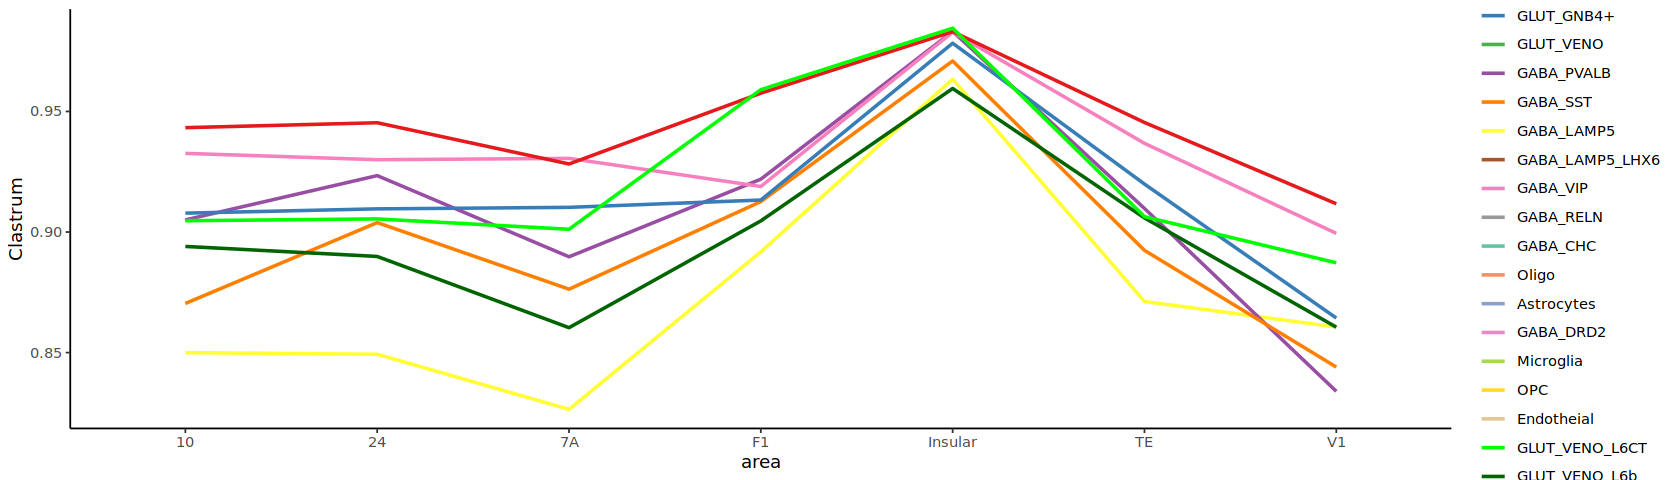

In [98]:
options(repr.plot.width=14, repr.plot.height=4)
gp1=ggplot(data=print_df,aes(x=area, y=Clastrum, group=type,color=type))+
  scale_color_manual(values = pale_all)+
    geom_line(size =1)+theme_classic()
gp1

In [99]:
pdf("/home/liuyx/liuyuxuan/spa_seurat/cla/fig_1206/area_compare_240118/zhexian.pdf", width=14, height=4)
gp1
dev.off()

png 
  2

In [93]:
unique(print_df$area)

[1] "10"      "24"      "7A"      "TE"      "F1"      "V1"      "Insular"
[8] "area"

In [95]:
print_df=print_df[!is.na(print_df$Clastrum),]
print_df[print_df$area=='area',]

Clastrum,type,area
<dbl>,<chr>,<chr>
